UOC Universitat Oberta de Catalunya i UB Universitat de Barcelona

Machine Learning | MSc en Bioinformàtica i Bioestadística

Glòria Tornero Ibars

# PAC2: Xarxes neuronals artificials

## **Descripción**



Los datos a tratar corresponden a un experimento en ratones relacionado con la predicción de 8 clases a partir de los niveles de expresión de proteínas/modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza.

Cada clase se basa en el genotipo, comportamiento y tratamiento. Según el genotipo, los ratones pueden ser controles (c) o trisómicos (t). Según el comportamiento, algunos ratones han sido estimulados para aprender (context-shock(CS)) y otros no (shock-context(SC)) y con el fin de evaluar el efecto del fármaco memantina (m) en la recuperación de la capacidad de aprendizaje en algunos ratones se ha inyectado la droga y a otros se ha inyectado suero salino (s) como placebo.

Las 8 clases son:
1. c-CS-s: control-context-shock-salino
2. c-CS-m: control-context-shock-memantina
3. c-SC-s: control-shock-context-salino
4. c-SC-m: control-shock-context-memantina
5. t-CS-s: trisómico-context-shock-salino
6. t-CS-m: trisómico-context-shock-memantina
7. t-SC-s: trisómico-shock-context-salino
8. t-SC-m: trisómico-shock-context-memantina

Los datos para esta actividad se encuentran en dos ficheros. El fichero data3.csv y el fichero clase3.csv. El fichero data3.csv con los niveles de proteínas, tiene 1080 filas (muestras) y 73 columnas. La primera columna es el código de la muestra y el resto de columnas son proteínas. El fichero clase3.csv con los
valores de la clase de 1 a 8, tiene 1080 filas (muestras) y una columna con el valor de la clase.

El objetivo planteado es la implementación y evaluación de una red neuronal basada en capas densas (fc) para la clasificación de las 8 clases.

In [ ]:
# en primer lloc, carreguem les llibreries necessàries per realitzar la PAC

# warnings
import warnings
warnings.filterwarnings("ignore")

# càrrega de fitxers
from google.colab import files
import os

# transformacions bàsiques
import pandas as pd
import numpy as np

# visualitzacions
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install visualkeras
import visualkeras

# normalització de les dades
from sklearn.preprocessing import MinMaxScaler

# train test
from sklearn.model_selection import train_test_split

# entrenament del model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# avaluació
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# seed
seed_value= 15
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)



# 1- Cargar los datos (data3.csv y clase3.csv) (5%)

In [ ]:
# carreguem els fitxers utilitzant la llibreria files, d'aquesta manera,
# es demana a l'usuari que carregui els fitxers i s'emmagatzemen les rutes corresponents
print("Please upload the class3.csv file:")
uploaded = files.upload()
labels_path = os.listdir('.')

print("Please upload the data3.csv file:")
uploaded = files.upload()
data_path = os.listdir('.')

Please upload the class3.csv file:


Saving class3.csv to class3 (2).csv
Please upload the data3.csv file:


Saving data3.csv to data3 (2).csv


In [ ]:
# utilitzant la llibreria pandas, llegim els dos fitxers seleccionats
protein_data = pd.read_csv("data3.csv")
class_labels = pd.read_csv("class3.csv")
class_labels.rename(columns={'x': 'Class'}, inplace=True)

# mostrem el head d'ambdós fitxers
print("Protein Data:\n",protein_data.head())
print("\nClass Labels:\n",class_labels.head())

Protein Data:
   MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  pCASP9_N   PSD95_N    SNCA_N  \
0  0.177565   2.373744  0.232224  ...  1.603310  2.014875  0.108234   
1  0.172817   2.292150  0.226972  ...  1.671738  2.004605  0.109749   
2  0.175722   2.283337  0.230247  ...  1.663550  2.016831  0.108196   
3  0.176463   2.152301  0.207004  ...  1.484624  1.957233  0.119883   
4  0.173627   2.134014  0.192158  ...  1.534835  2.009109  0.119524   

   Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N  \
0     1.044979         0.831557  0.188852  0

S'observa que les dades carregades corresponen a les descrites en la descripció introductòria. Respecte a les proteïnes es veuen valors diferents en cada proteïna, per sota i per sobre d'1, i que podrien estar en diferents escales. S'hauran d'analitzar i en cas necessari, normalitzar les dades perquè els valors de les diferents proteïnes siguin equitatius en l'aprenentatge del model.

# 2- Realizar un estudio exploratorio de los datos con gráficos y tablas. (10%)


In [ ]:
# mostrem un resum estadístic de les dades
protein_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1080.0,0.426375,0.249248,0.145327,0.288163,0.366540,0.488204,2.516367
ITSN1_N,1080.0,0.617999,0.251873,0.245359,0.473669,0.566365,0.699722,2.602662
BDNF_N,1080.0,0.319440,0.049764,0.115181,0.287650,0.316703,0.349149,0.497160
NR1_N,1080.0,2.298994,0.348348,1.330831,2.059152,2.298688,2.530500,3.757641
NR2A_N,1080.0,3.849333,0.937420,1.737540,3.160287,3.763306,4.447601,8.482553
...,...,...,...,...,...,...,...,...
SHH_N,1080.0,0.226676,0.028989,0.155869,0.206395,0.224000,0.241655,0.358289
pS6_N,1080.0,0.121521,0.014276,0.067254,0.110839,0.121626,0.131955,0.158748
pCFOS_N,1080.0,0.130566,0.023618,0.085419,0.113357,0.126152,0.143306,0.256529
SYP_N,1080.0,0.446073,0.066432,0.258626,0.398082,0.448459,0.490773,0.759588


Utilitzant la funció describe, s'obté un resum estadístic de la distribució dels valors per cada variable:
- Totes les proteïnes tenen una mostra de 1080 observacions, per tant, aparentment no sembla que hi hagi valors nulls o en blanc.
- La diferència entre els corresponents valors mínims i màxims entre les diferents proteïnes indiquen que l'escala de les variables pot no ser la mateixa i que caldrà estandarditzar o normalitzar les dades.
- La mitjana (mean) i l'IQ2 (median) indiquen que en algunes proteïnes la distribució està desviada a la dreta o esquerra.
- La desviació estàndar indica que en algunes proteïnes la variabilitat i dispersió dels valors és molt més gran que en altres, com per exemple l'NR2A_N amb una desviació estàndar del 0.9374.

A partir d'aquest resum estadístic es pot concloure que les variables del conjunt de dades presenten diferents rangs i dispersió i es pot intuir que en algunes variables hi hagi presència d'outliers.

In [ ]:
# protein_data.info()

# Comprovem que els valors siguin numèrics
numeric_columns = len(protein_data.select_dtypes(include=['number']).columns)
non_numeric_columns = protein_data.select_dtypes(exclude=['number']).columns
print("Numeric Columns:",numeric_columns)
print("Non-Numeric Columns:", len(list(non_numeric_columns)),":\n", list(non_numeric_columns))

Numeric Columns: 72
Non-Numeric Columns: 1 :
 ['MouseID']


Totes les variables són numèriques excepte l'id del ratolí.

In [ ]:
def mouseid_data(data):
    """
    Preprocess mouse id data and display relevant information.

    Parameters:
    - data: DataFrame containing id data.

    Returns:
    - is_consecutive: Boolean indicating if numbers after '_' are consecutive.
    - max_number: Maximum number after '_'.
    - is_15_unique_values: Boolean indicating if each distinct part before '_'
                          has 15 unique values for the second part.
    - num_distinct_parts: Total count of distinct parts before '_'.
    - length_check: Boolean indicating if each distinct part before '_'
                    * 15 is equal to the length of the data.
    """

    # Copiem les dades per no modificar les originals
    data_copy = data.copy()
    data_copy['MouseID'] = data_copy['MouseID'].astype(str)

    # Analitzem la part prèvia al separador
    data_copy['MouseID_Part1'] = data_copy['MouseID'].str.split('_').str[0]
    distinct_parts = data_copy['MouseID_Part1'].unique()

    # Analitzem la part posterior al separador
    data_copy['MouseID_Part2'] = data_copy['MouseID'].str.split('_').str[1].astype(float)
    is_consecutive = data_copy['MouseID_Part2'].diff().eq(1).all()
    max_number = data_copy['MouseID_Part2'].max()
    is_15_unique_values = (data_copy.groupby('MouseID_Part1')['MouseID_Part2'].nunique() == 15).all()

    # Comprovem si el producte del nombre total de parts distintives i el valor màxim després de '_'
    # és igual a la longitud de les dades, assegurant la consistència de les dades
    num_distinct_parts = len(distinct_parts)
    length_check = num_distinct_parts * max_number == len(data_copy)

    print("Distinct Parts Before '_':", distinct_parts)
    print("\nNumbers After '_' are Consecutive:", is_consecutive)
    print("Maximum Number After '_':", max_number)
    print("Each Distinct Part Before '_' has 15 unique values:", is_15_unique_values)
    print("Total Distinct Parts Before '_':", num_distinct_parts)
    print("Total Distinct Parts Before '_' * 15 unique values after '_' is equal to the length of data:", length_check)

    return is_consecutive, max_number, is_15_unique_values, num_distinct_parts, length_check

is_consecutive, max_number, is_15_unique_values, num_distinct_parts, length_check = mouseid_data(protein_data)


Distinct Parts Before '_': ['309' '311' '320' '321' '322' '3415' '3499' '3507' '3520' '3521' '294'
 '3412' '3413' '3419' '3420' '3500' '3503' '362' '364' '365' '3477' '3478'
 '3479' '3480' '3484' '3497' '50810A' '50810D' '50810F' '3422' '3423'
 '3424' '3481' '3488' '3489' '3490' '3516' 'J2292' '3414' '3416' '3417'
 '3429' '3504' '3505' '3522' '361' '363' '293' '3411' '3418' '3501' '3502'
 '3530' '3534' '3605' '3606' '18899' '3476' '3483' '3498' '50810B'
 '50810C' '50810E' '3421' '3425' '3426' '3491' '3513' '3517' '3525'
 'J1291' 'J3295']

Numbers After '_' are Consecutive: False
Maximum Number After '_': 15.0
Each Distinct Part Before '_' has 15 unique values: True
Total Distinct Parts Before '_': 72
Total Distinct Parts Before '_' * 15 unique values after '_' is equal to the length of data: True


S'observa que l'identificador del ratolí està compost per dos codis numèrics separats per una barra baixa i que segueix una estructura coherent: hi ha 72 codis únics abans del separador, i 15 codis consecutius per cada un d'aquests 72 codis distintius.

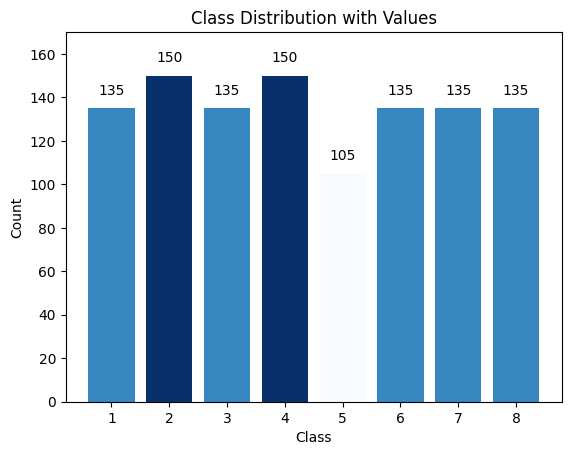

In [ ]:
def plot_class_distribution(class_labels):
    """
    Plot class distribution with values on top of each bar.

    Parameters:
    - class_labels: DataFrame containing class labels.

    Returns:
    - None
    """

    # Contem el número de registres per classe
    class_counts = class_labels['Class'].value_counts()
    class_counts = class_counts.sort_values(ascending=False)

    # Apliquem un color gradient a les classes
    normalized_counts = (class_counts - class_counts.min()) / (class_counts.max() - class_counts.min())
    colors = plt.cm.Blues(normalized_counts)

    # Mostrem el gràfic
    fig, ax = plt.subplots()
    bars = ax.bar(class_counts.index, class_counts, color=colors)

    # Mostrem l'etiqueta de valors
    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(count),
                ha='center', va='bottom')

    # Ajustem els eixos
    ax.set_ylim(0, max(class_counts) + 20)
    ax.set_xticks(class_counts.index)

    # Afegim títols...
    plt.title('Class Distribution with Values')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.show()

plot_class_distribution(class_labels)


A través del gràfic observem la quantitat de mostres per cada classe és desigual: les classes 2 i 4 són les dues més representades i, en canvi, la classe 5 és la menys representada de les 8. El desequilibri entre classes pot afectar el rendiment d'un model i perjudicar aquelles classes amb menys dades, podent arribar a ser necessari en casos més extrems, realitzar tècniques de ponderació de les dades o augment de les dades per igualar la distribució.

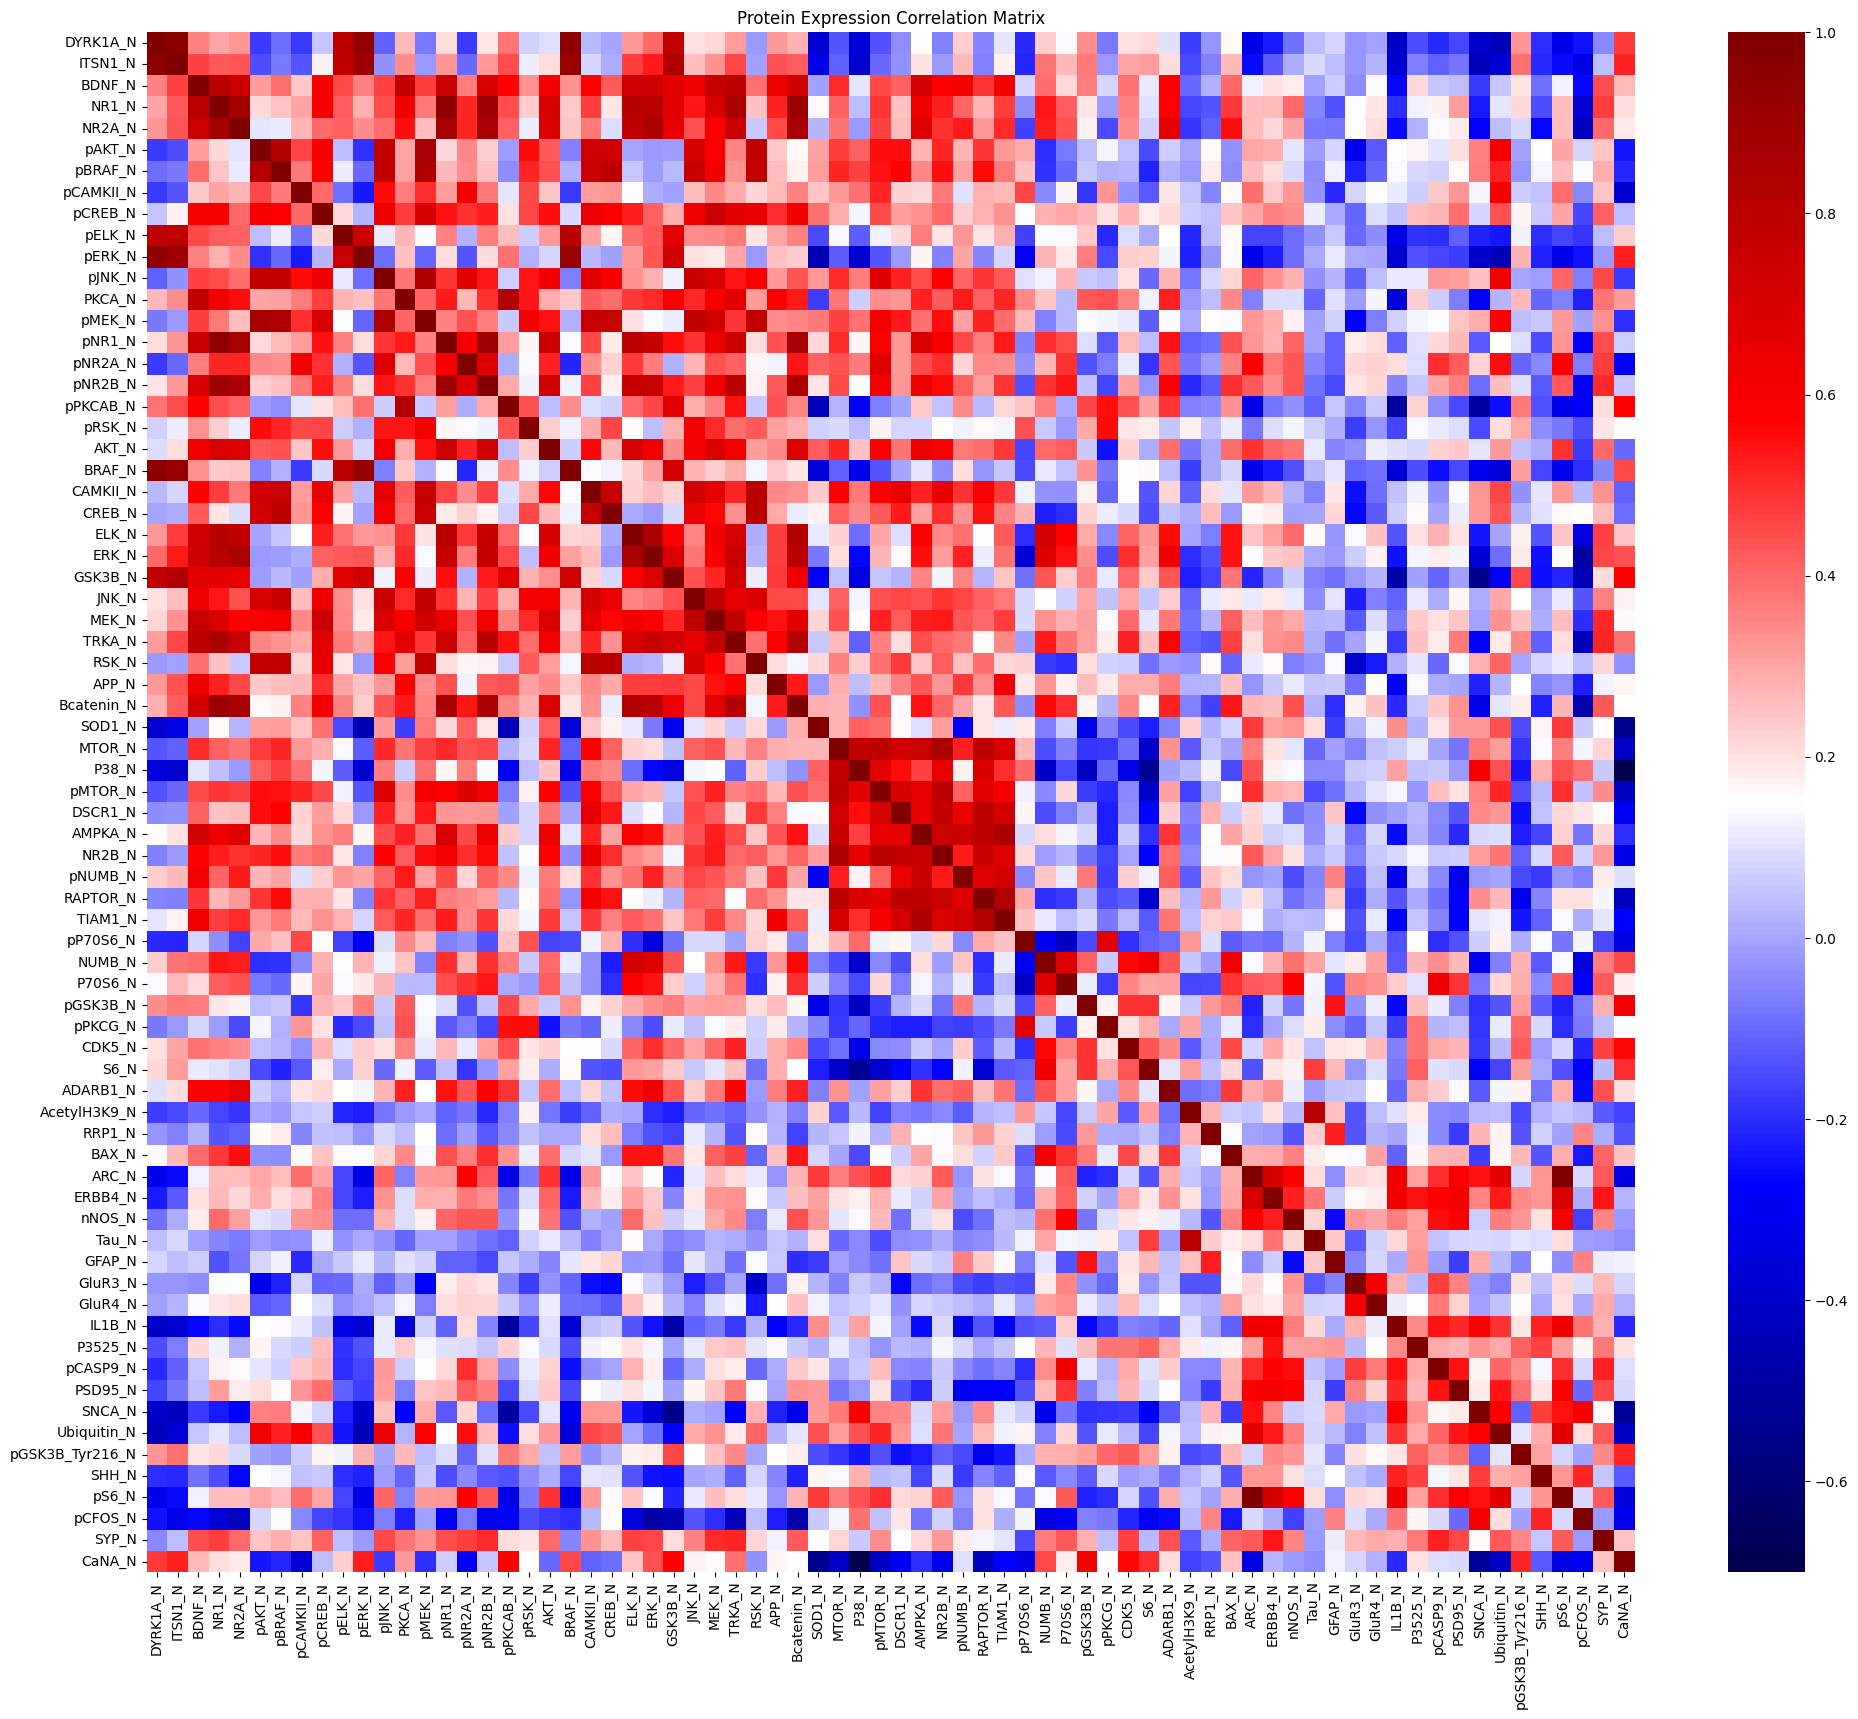

In [ ]:
# mostrem una matriu de correlació entre variables
corr_matrix = protein_data.corr()
plt.figure(figsize=(24, 20))
# dibuixem el mapa de calor
sns.heatmap(corr_matrix, cmap='seismic', annot=False)
plt.title('Protein Expression Correlation Matrix')
plt.show()

A través de la matriu de correlació es pot observar si existeix una correlació entre variables: els valors propers a 0 indiquen que no hi ha una correlació entre variables, i els propers a 1 o -1 indican una forta correlació positiva o negativa. A simple vista, no es poden detectar patrons de correlacions clares entre les proteïnes annalitzades tot i que s'observen grups de proteïnes amb influència entre sí  

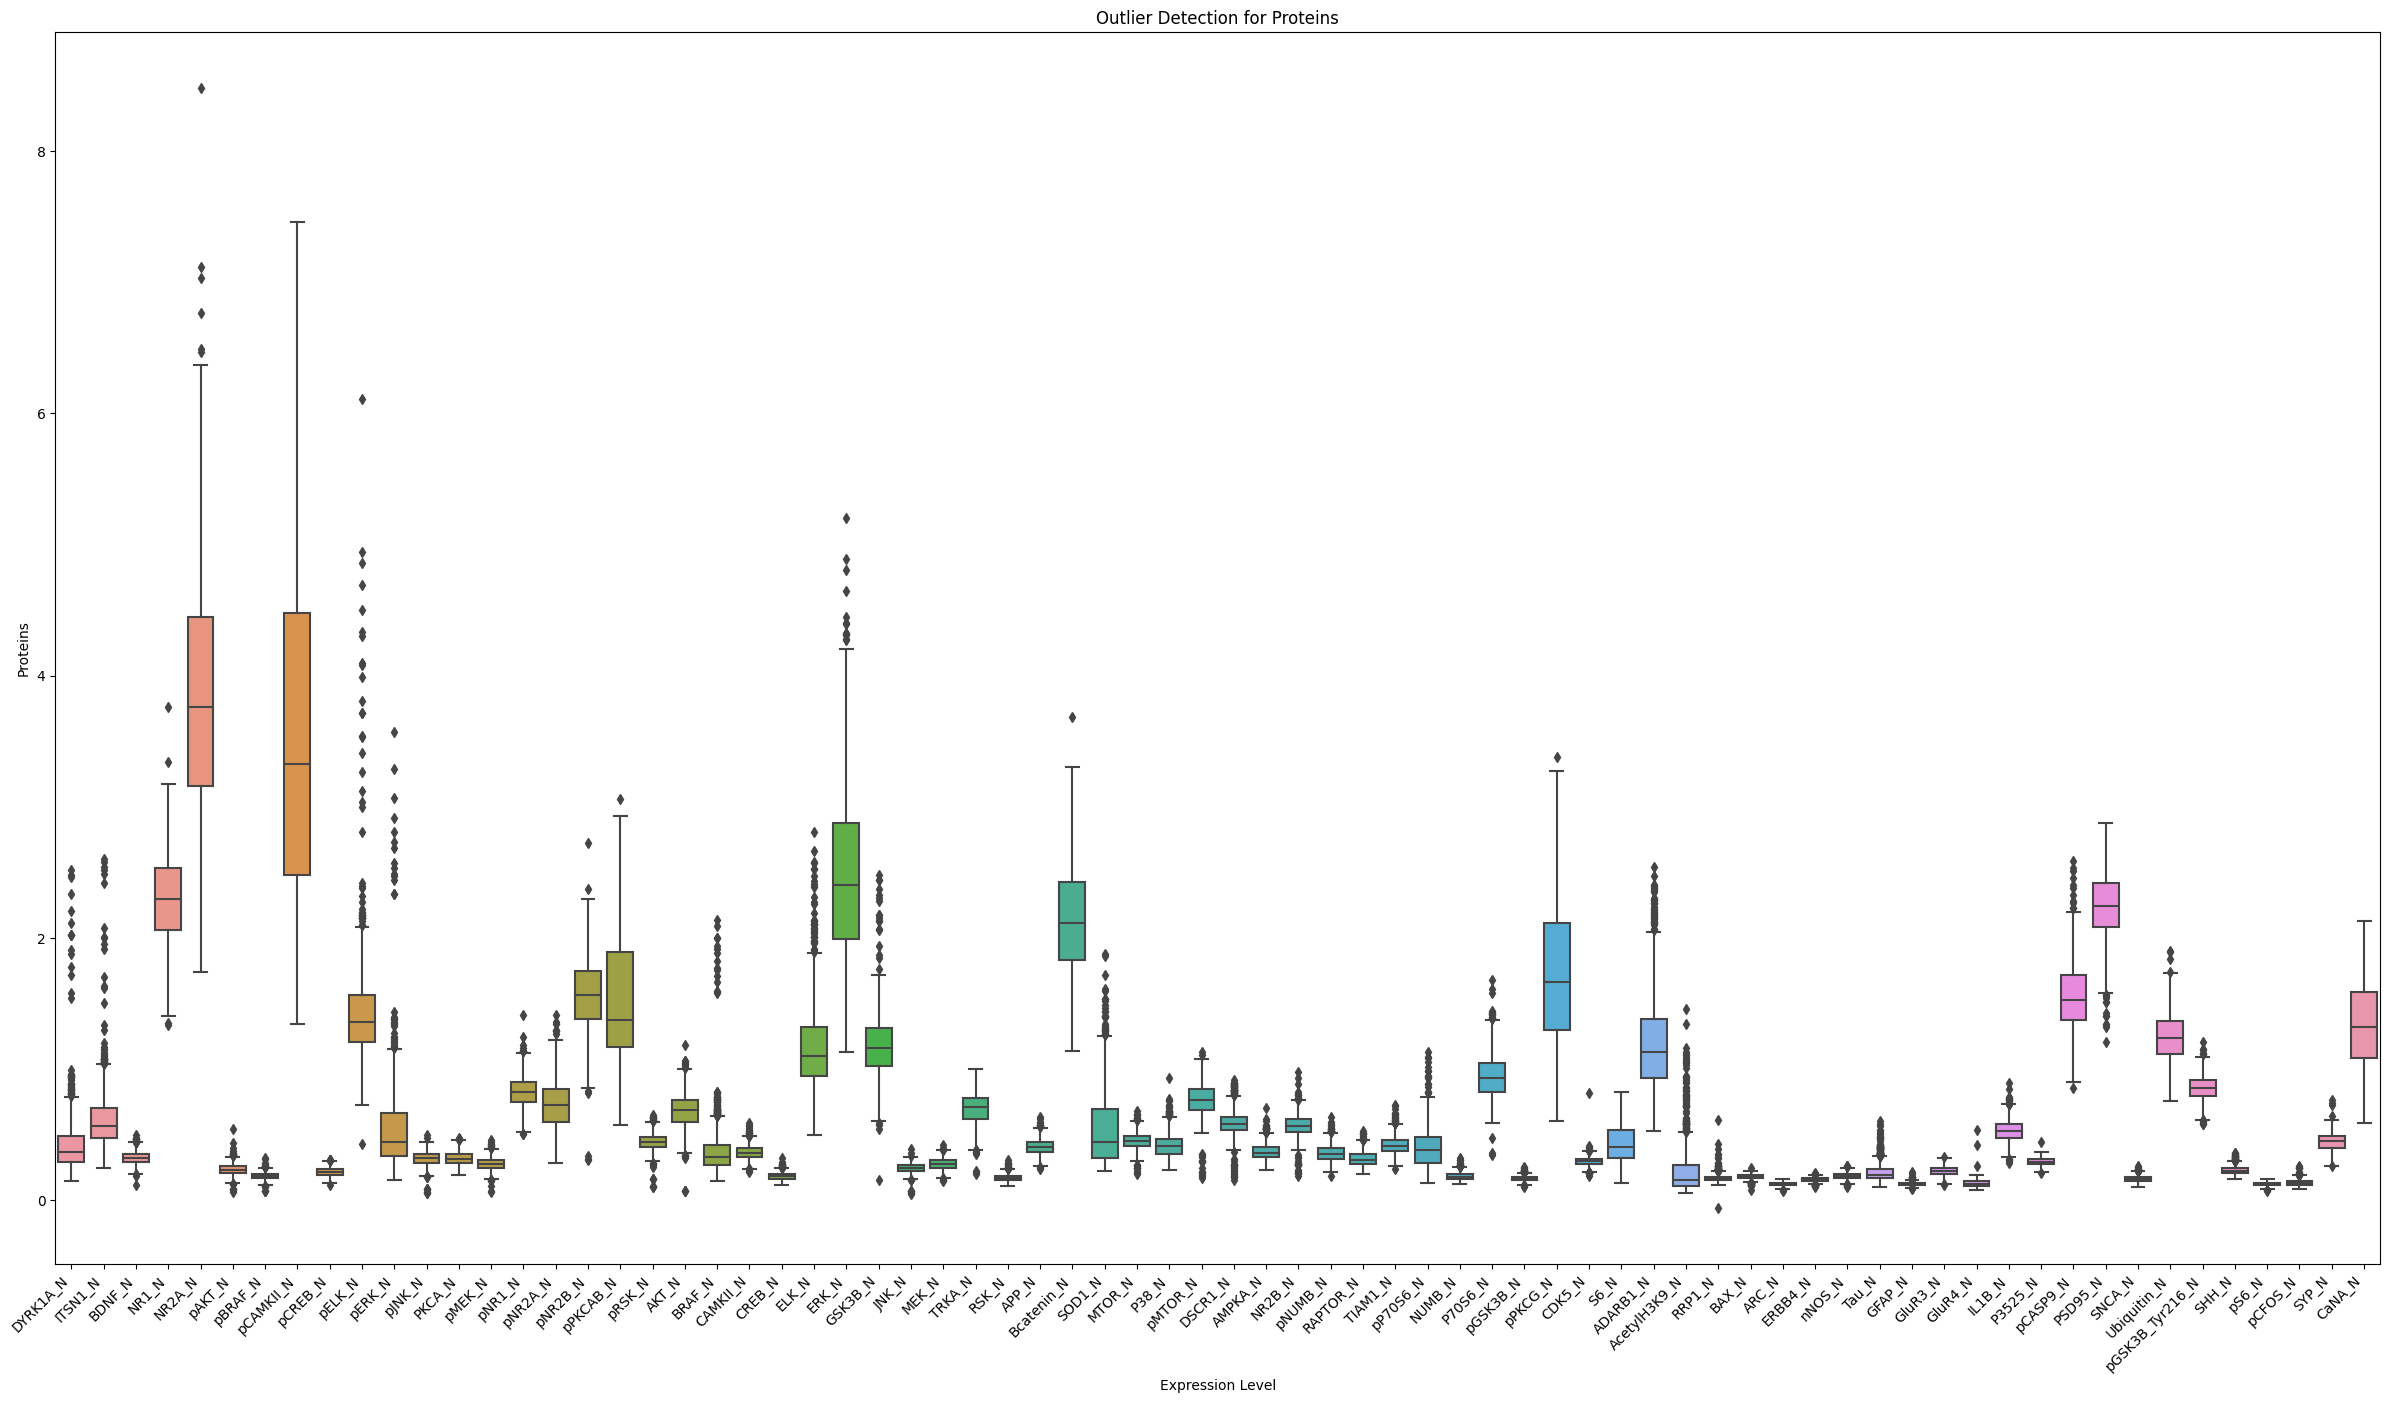

In [ ]:
numeric_proteins = protein_data.iloc[:, 1:]

def plot_boxplot(data, title='Outlier Detection for Proteins', xlabel='Expression Level', ylabel='Proteins', rotation=45):
    """
    Parameters:
    - data: Pandas DataFrame
      A dataset containing numeric values representing protein expression levels. The function will create a boxplot for each column in the DataFrame.
    - title (optional): String, default='Outlier Detection for Proteins'
      The title of the boxplot visualization.
    - xlabel (optional): String, default='Expression Level'
      The label for the x-axis, indicating the nature of the data being plotted.
    - ylabel (optional): String, default='Proteins'
      The label for the y-axis, representing the proteins under consideration.
    - rotation (optional): Numeric, default=45
      The rotation angle for x-axis labels, enhancing readability, particularly useful when there are many proteins.

    Returns:
    - None
    """

    plt.figure(figsize=(30, 16))
    sns.boxplot(data=data)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

plot_boxplot(numeric_proteins)


Observem que la distribució de les variables no és uniforme, tenen diferents dispersions i ocupen diferents rangs. Per tant, és necessari normalitzar les dades per equilibrar la distribució.

In [ ]:
# anàlisi dels outliers

def analyse_outliers(protein_data, show_metrics=True):
    """
    Analyze outliers in protein data and print metrics.

    Parameters:
    - protein_data: DataFrame containing protein data.
    - show_metrics: Boolean indicating whether to print metrics.

    Returns:
    - outliers_count_by_protein: Outliers count for each protein.
    - total_outliers_count: Total outliers count.
    - outliers_percentage_by_protein: Outliers percentage for each protein.
    - total_outliers_percentage: Total outliers percentage.
    - top_10_proteins: Top 10 proteins with the highest outliers percentage.
    """

    # Calculem l'IQR per cada proteïna
    Q1 = protein_data.quantile(0.25)
    Q3 = protein_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determinem els outliers per cada proteïna
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((protein_data < lower_bound) | (protein_data > upper_bound))

    # Calculem les mètriques
    outliers_count_by_protein = outliers.sum()
    total_outliers_count = outliers.sum().sum()
    outliers_percentage_by_protein = outliers.mean() * 100
    total_outliers_percentage = total_outliers_count / (protein_data.shape[0] * protein_data.shape[1]) * 100

    # Seleccionem les proteines amb més outliers
    sorted_outliers_percentage = outliers_percentage_by_protein.sort_values(ascending=False)
    top_10_proteins = sorted_outliers_percentage.head(10)

    # Imprimim els resultats
    print("\nOutliers Count by Protein:\n", outliers_count_by_protein)
    print("\nOutliers Percentage by Protein:\n", outliers_percentage_by_protein.apply(lambda x: f"{x:.4f}%"))
    print("\nTop 10 Proteins with More Outliers Percentage:\n", top_10_proteins.apply(lambda x: f"{x:.4f}%"))
    print("\nTotal Outliers Count:", total_outliers_count)
    print("Total Outliers Percentage:", f"{round(total_outliers_percentage, 4):.4f}%")
    print("Average Number of Outliers:", round(outliers_count_by_protein.mean()))
    print("Minimum Number of Outliers:", outliers_count_by_protein.min())
    print("Maximum Number of Outliers:", outliers_count_by_protein.max())

    # Tornem els valors calculats i emmagatzemats en variables per poder utilitzar-los més endavant
    return (
        outliers_count_by_protein,
        total_outliers_count,
        outliers_percentage_by_protein,
        total_outliers_percentage,
        top_10_proteins
    ) if show_metrics else (
        None, None, None, None, None
    )

outliers_metrics = analyse_outliers(protein_data, show_metrics=True)

outliers_count_by_protein, total_outliers_count, outliers_percentage_by_protein, total_outliers_percentage, top_10_proteins = outliers_metrics



Outliers Count by Protein:
 ADARB1_N    36
AKT_N       16
AMPKA_N     28
APP_N       13
ARC_N        3
            ..
pP70S6_N    17
pPKCAB_N     1
pPKCG_N      1
pRSK_N      23
pS6_N        3
Length: 73, dtype: int64

Outliers Percentage by Protein:
 ADARB1_N    3.3333%
AKT_N       1.4815%
AMPKA_N     2.5926%
APP_N       1.2037%
ARC_N       0.2778%
             ...   
pP70S6_N    1.5741%
pPKCAB_N    0.0926%
pPKCG_N     0.0926%
pRSK_N      2.1296%
pS6_N       0.2778%
Length: 73, dtype: object

Top 10 Proteins with More Outliers Percentage:
 AcetylH3K9_N    7.0370%
Tau_N           6.7593%
BRAF_N          6.1111%
DSCR1_N         5.1852%
DYRK1A_N        4.2593%
RRP1_N          3.9815%
ITSN1_N         3.9815%
pELK_N          3.8889%
ELK_N           3.7037%
ADARB1_N        3.3333%
dtype: object

Total Outliers Count: 1411
Total Outliers Percentage: 1.7897%
Average Number of Outliers: 19
Minimum Number of Outliers: 0
Maximum Number of Outliers: 76


El percentatge total d'outliers és 1.7897% del conjunt de dades, per tant, si bé són presents podríem considerar que es tracta d'un percentatge relativament baix i poc notables.

En estudis més extensos, podria ser d'interès analitzar si aquests outliers són deguts a errors en les dades o si indiquen alguna característica biològica significativa.

In [ ]:
# unim les variables amb la classe a predir

def merge_data_with_labels(protein_data, class_labels):
    """
    Merge protein data with class labels.

    Parameters:
    - protein_data: DataFrame containing protein data.
    - class_labels: DataFrame containing class labels.

    Returns:
    - merged_data: Merged DataFrame.
    """

    merged_data = pd.merge(protein_data, class_labels, left_index=True, right_index=True)
    return merged_data

merged_data = merge_data_with_labels(protein_data, class_labels)

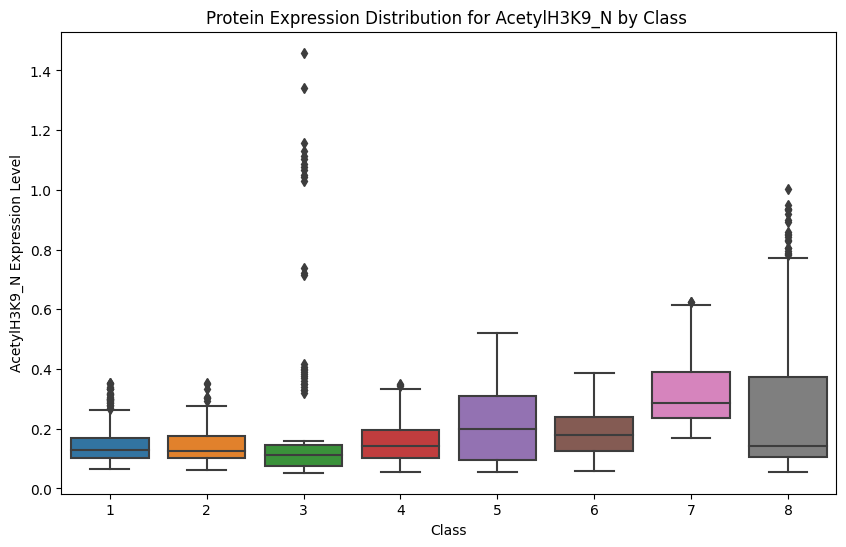

In [ ]:
# d'aquesta manera, podem analitzar la distribució de cada proteïna per cada classe

def plot_protein_boxplot(data, protein_column, title_suffix='', xlabel='Class', ylabel='Expression Level', figsize=(10, 6)):
    """
    Create a boxplot visualization for protein expression levels, grouped by class.

    Parameters:
    - data: Pandas DataFrame.
      The dataset containing both class labels and protein expression levels.
    - protein_column: String
      The column name representing the protein for which the expression distribution is visualized.
    - title_suffix (optional): String, default=''
      Additional text to append to the title for further customization.
    - xlabel (optional): String, default='Class'
      The label for the x-axis, indicating the class variable.
    - ylabel (optional): String, default='Expression Level'
      The label for the y-axis, representing the protein expression levels.
    - figsize (optional): Tuple, default=(10, 6)
      The size of the figure in inches.

    Returns:
    - None
    """

    plt.figure(figsize=figsize)
    sns.boxplot(x='Class', y=data[protein_column], data=data)

    plt.title(f'Protein Expression Distribution for {protein_column} by Class {title_suffix}')
    plt.xlabel(xlabel)
    plt.ylabel(f'{protein_column} Expression Level')

    plt.show()

plot_protein_boxplot(merged_data, 'AcetylH3K9_N')


Amb la funció plot_protein_boxplot i especificant la proteïna a analitzar, podem veure la distribució d'aquesta per cada classe. En el cas d'AcetylH3K9_N, la proteïna amb més outliers, observem que són molt més dispersos en la classe 3 que no pas en la classe 5 o 6 per exemple. Per tant, és probable que perjudiquin més les classes amb més presència d'aquests que no pas les classes menys disperses.

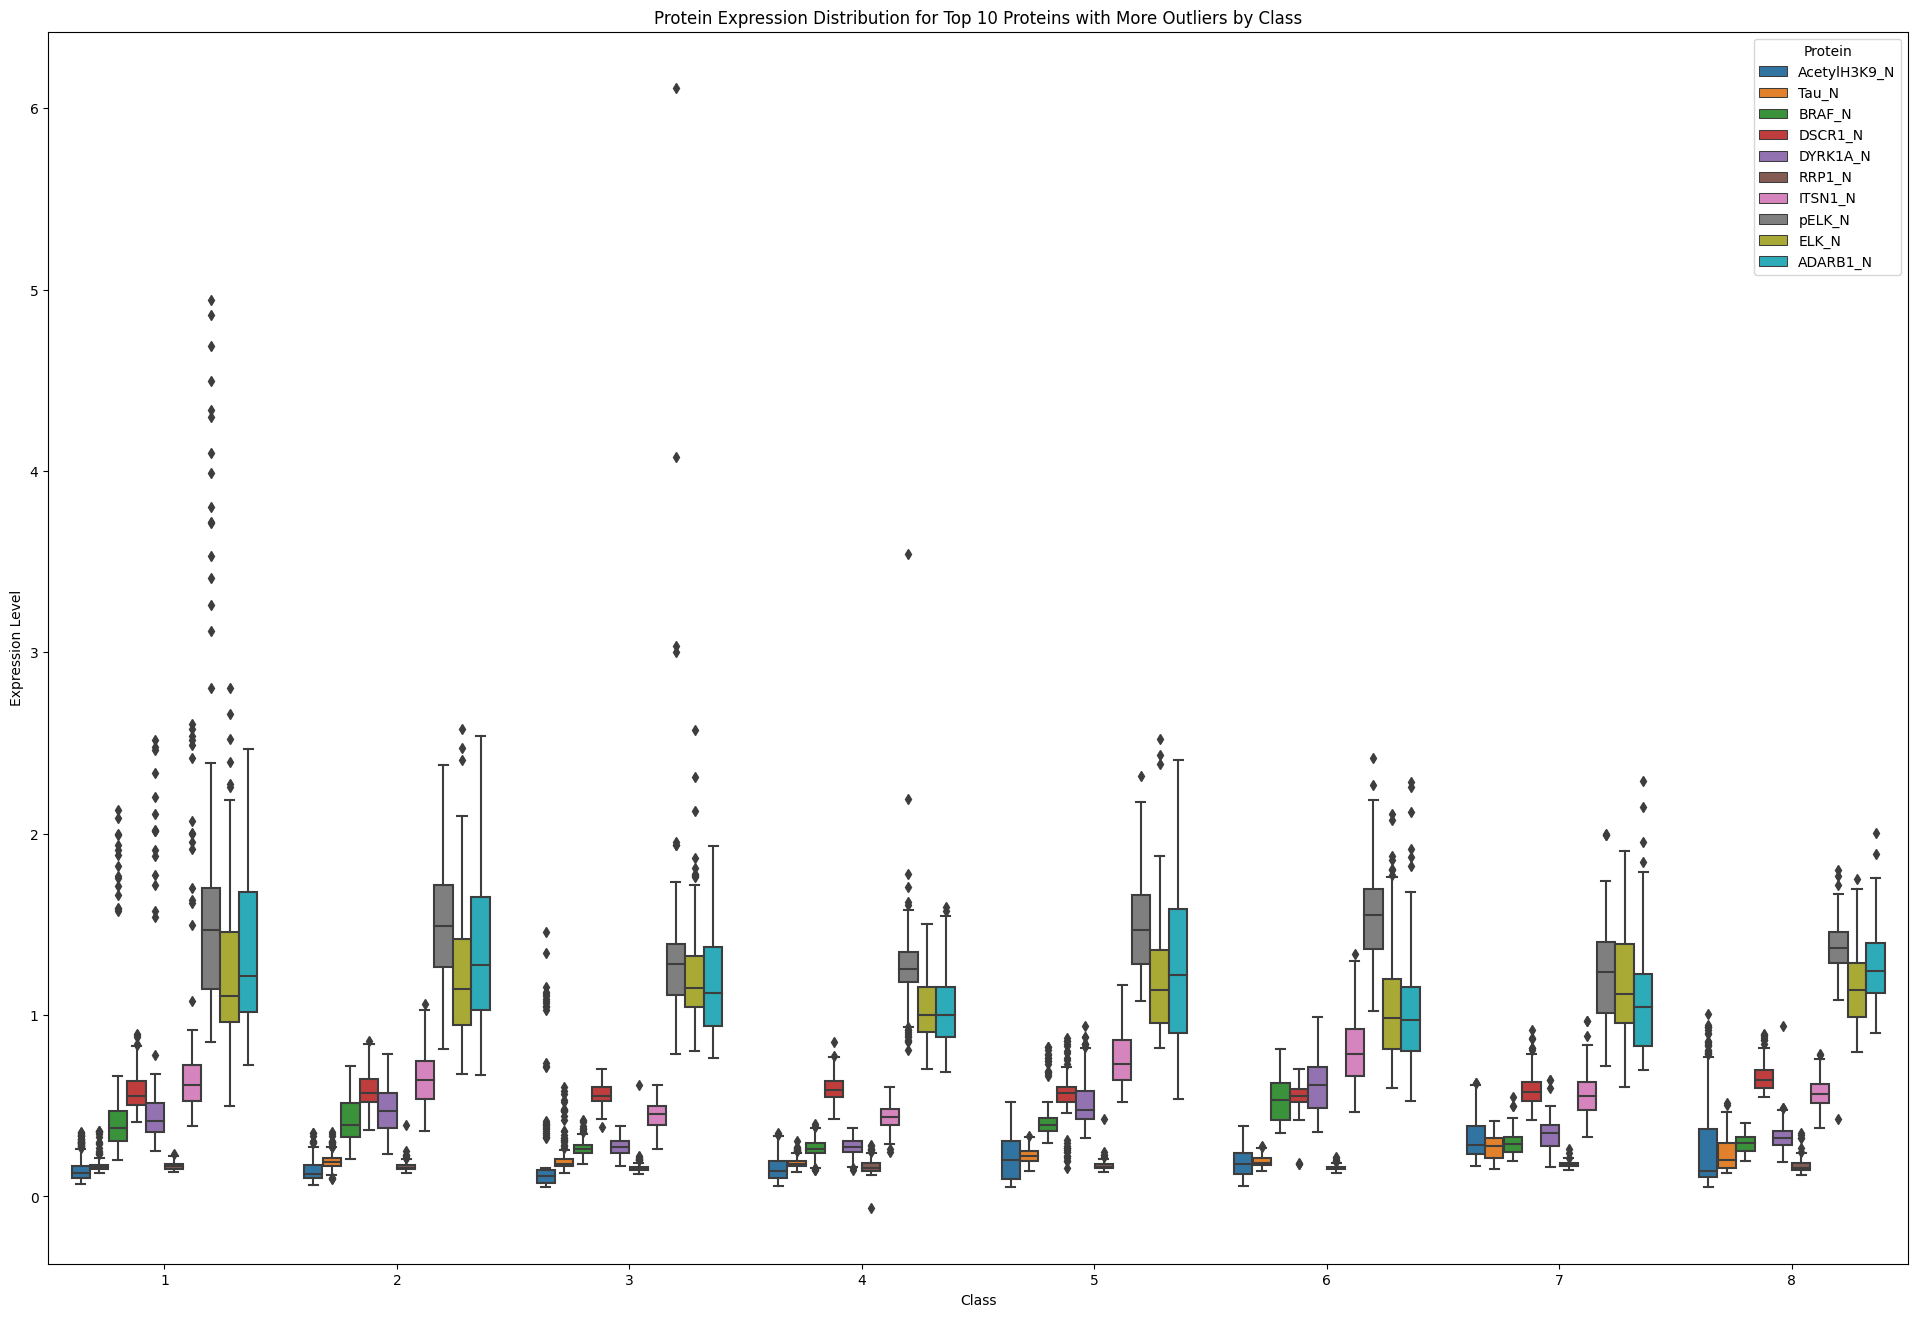

In [ ]:
def plot_top_10_proteins(data, top_10_proteins, title='Protein Expression Distribution for Top 10 Proteins with More Outliers by Class', xlabel='Class', ylabel='Expression Level', figsize=(24, 16)):
    """
    Create a grouped boxplot visualization for the expression distribution of the top 10 proteins with more outliers, grouped by class.

    Parameters:
    - data: DataFrame
      The dataset containing protein expression levels and class labels.
    - top_10_proteins: Pandas Series or DataFrame
      A pandas Series or DataFrame containing the top 10 proteins with more outliers, typically obtained through outlier detection.
    - title (optional): String, default='Protein Expression Distribution for Top 10 Proteins with More Outliers by Class'
      The title of the grouped boxplot visualization.
    - xlabel (optional): String, default='Class'
      The label for the x-axis, indicating the class variable.
    - ylabel (optional): String, default='Expression Level'
      The label for the y-axis, representing protein expression levels.
    - figsize (optional): Tuple, default=(24, 16)
      The size of the figure in inches.

    Returns:
    - None
    """

    # Agafem els noms de les 10 proteïnes amb més outliers
    top_10_protein_names = top_10_proteins.index.tolist()
    data_top_10 = data[top_10_protein_names + ['Class']]
    data_top_10_long = data_top_10.melt(id_vars='Class', var_name='Protein', value_name='Expression Level')

    # Mostrem un boxplot per cada una de les 10 proteïnes i per classe
    plt.figure(figsize=figsize)
    sns.boxplot(x='Class', y='Expression Level', hue='Protein', data=data_top_10_long)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

plot_top_10_proteins(merged_data, top_10_proteins)

D'una banda, s'observa la diferència de rangs entre les diferents variables i, d'altra banda, la diferència en la quantitat d'outliers per classe i la distribució d'aquests, havent-hi proteïnes amb valors molt allunyats (pELK_N).

# 3- Normalizar las expresiones con la transformación minmax. (5%)


A continuació procedim a normalitzar les dades. Aquest procés pot ser realitzat mitjançant llibreries específiques o manualment. Veurem les dues maneres tot i que ens decantarem per la manual, ja que l'operació no és gaire complexa i evitar dependre de llibreries externes.

In [ ]:
# opció utilitzant la llibreria scaler.fit_transform de sklearn

# Excloem les variables no numèriques
protein_data_to_normalize = protein_data.iloc[:, 1:]

# definim i apliquem l'scaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(protein_data_to_normalize)

# creem un nou dataframe
normalized_protein_data = pd.DataFrame(normalized_data, columns=protein_data_to_normalize.columns)
normalized_protein_data.insert(0, 'MouseID', protein_data['MouseID'])

# mostrem i comprovem que s'hagi aplicat correctament
print(normalized_protein_data.head())
normalized_protein_data.describe().T

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006   
1   309_2  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887   
2   309_3  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369   
3   309_4  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530   
4   309_5  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  pCASP9_N   PSD95_N    SNCA_N  \
0  0.448666   0.168257  0.617322  ...  0.432843  0.483783  0.044770   
1  0.429899   0.154925  0.590173  ...  0.472327  0.477640  0.054452   
2  0.441381   0.153485  0.607102  ...  0.467603  0.484953  0.044526   
3  0.444307   0.132074  0.486945  ...  0.364359  0.449304  0.119259   
4  0.433100   0.129086  0.410194  ...  0.393332  0.480334  0.116965   

   Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N  \
0     0.256699         0.405228  0.162941  0.426816  0.1339

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1080.0,0.118534,0.105122,0.0,0.060242,0.093298,0.144611,1.0
ITSN1_N,1080.0,0.158079,0.106848,0.0,0.096852,0.136175,0.192747,1.0
BDNF_N,1080.0,0.534739,0.130279,0.0,0.451515,0.527572,0.612515,1.0
NR1_N,1080.0,0.398945,0.143541,0.0,0.300115,0.398819,0.494340,1.0
NR2A_N,1080.0,0.313090,0.138980,0.0,0.210933,0.300335,0.401787,1.0
...,...,...,...,...,...,...,...,...
SHH_N,1080.0,0.349804,0.143213,0.0,0.249611,0.336580,0.423804,1.0
pS6_N,1080.0,0.593119,0.156038,0.0,0.476368,0.594273,0.707167,1.0
pCFOS_N,1080.0,0.263848,0.138030,0.0,0.163272,0.238049,0.338305,1.0
SYP_N,1080.0,0.374174,0.132609,0.0,0.278377,0.378936,0.463402,1.0


In [ ]:
# opció manual min max

def normalise_protein_data(protein_data):
    """
    Normalise protein data by performing min-max scaling.

    Parameters:
    - protein_data: DataFrame containing protein data.

    Returns:
    - normalised_data: Normalised DataFrame without ID.
    - normalised_data_with_id: Normalised DataFrame with ID.
    - v_min: Minimum values for normalisation.
    - v_max: Maximum values for normalisation.
    """

    # Busquem els valors mínim i màxim
    v_min = np.min(protein_data.iloc[:, 1:])
    v_max = np.max(protein_data.iloc[:, 1:])

    # Normalitzem els valors
    normalised_data = (protein_data.iloc[:, 1:] - v_min) / (v_max - v_min)

    # Creem un nou df
    first_column_name = protein_data.columns[0]
    normalised_data_with_id = pd.DataFrame()
    normalised_data_with_id[first_column_name] = protein_data[first_column_name]
    normalised_data_with_id = pd.concat([normalised_data_with_id, normalised_data], axis=1)

    return normalised_data, normalised_data_with_id, v_min, v_max

normalised_data, normalised_data_with_id, min_value, max_value = normalise_protein_data(protein_data)

# mostrem i comprovem que s'hagi aplicat correctament
print("\nNormalised Data with ID:\n",normalised_data_with_id.head())
print("\nDescriptive Statistics for Normalized Data:\n", normalised_data.describe().T)


Normalised Data with ID:
   MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006   
1   309_2  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887   
2   309_3  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369   
3   309_4  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530   
4   309_5  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  pCASP9_N   PSD95_N    SNCA_N  \
0  0.448666   0.168257  0.617322  ...  0.432843  0.483783  0.044770   
1  0.429899   0.154925  0.590173  ...  0.472327  0.477640  0.054452   
2  0.441381   0.153485  0.607102  ...  0.467603  0.484953  0.044526   
3  0.444307   0.132074  0.486945  ...  0.364359  0.449304  0.119259   
4  0.433100   0.129086  0.410194  ...  0.393332  0.480334  0.116965   

   Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N  \
0     0.256699         0.405228 

Els valors de les proteïnes han sigut normalitzats correctament i tant utilitzant la funció com fent la transformació manual, ens retorna els mateixos resultats.

A continuació comprovem gràficament com ha afectat aquesta normalització als valors.

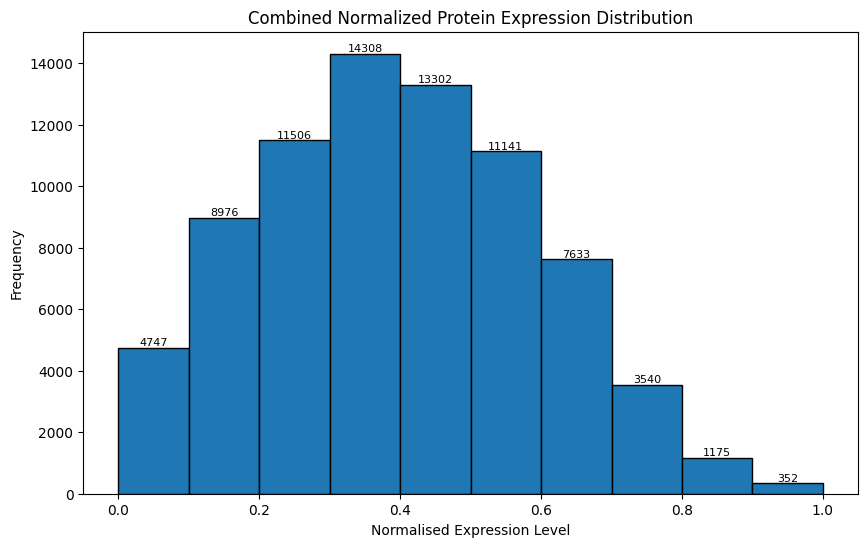

In [ ]:
import matplotlib.pyplot as plt

def create_combined_histogram(data, bins=10, figsize=(10, 6)):
    """
    Create a combined histogram with bars representing the total count of values across all proteins.

    Parameters:
    - data: DataFrame containing the data.
    - bins: Number of bins in the histogram.
    - figsize: Size of the plot.

    Returns:
    - hist_values: Histogram values representing the total count across all proteins.
    - edges: Bin edges.
    """

    # Definim un histograma amb els valors normalitzats
    plt.figure(figsize=figsize)
    combined_data = data.iloc[:, 1:].values.flatten()
    hist_values, edges, _ = plt.hist(combined_data, bins=bins, edgecolor='black')

    # Afegim etiquetes de valors
    for i in range(len(hist_values)):
        plt.text(edges[i] + (edges[i + 1] - edges[i]) / 2, hist_values[i], str(int(hist_values[i])),
                 ha='center', va='bottom', fontsize=8)
    plt.title('Combined Normalized Protein Expression Distribution')
    plt.xlabel('Normalised Expression Level')
    plt.ylabel('Frequency')

    plt.show()

    return hist_values, edges

hist_values, edges = create_combined_histogram(normalised_data, bins=10)


Un cop normalitzats els valors, representem la distribució d'aquests i observem una lleugera tendència de desviació a la dreta ("right skew" ), per tant, en aquests casos majoritàriament, la mitjana és major que la mediana (valor central), i indica possibles outliers superiors com hem vist prèviament.

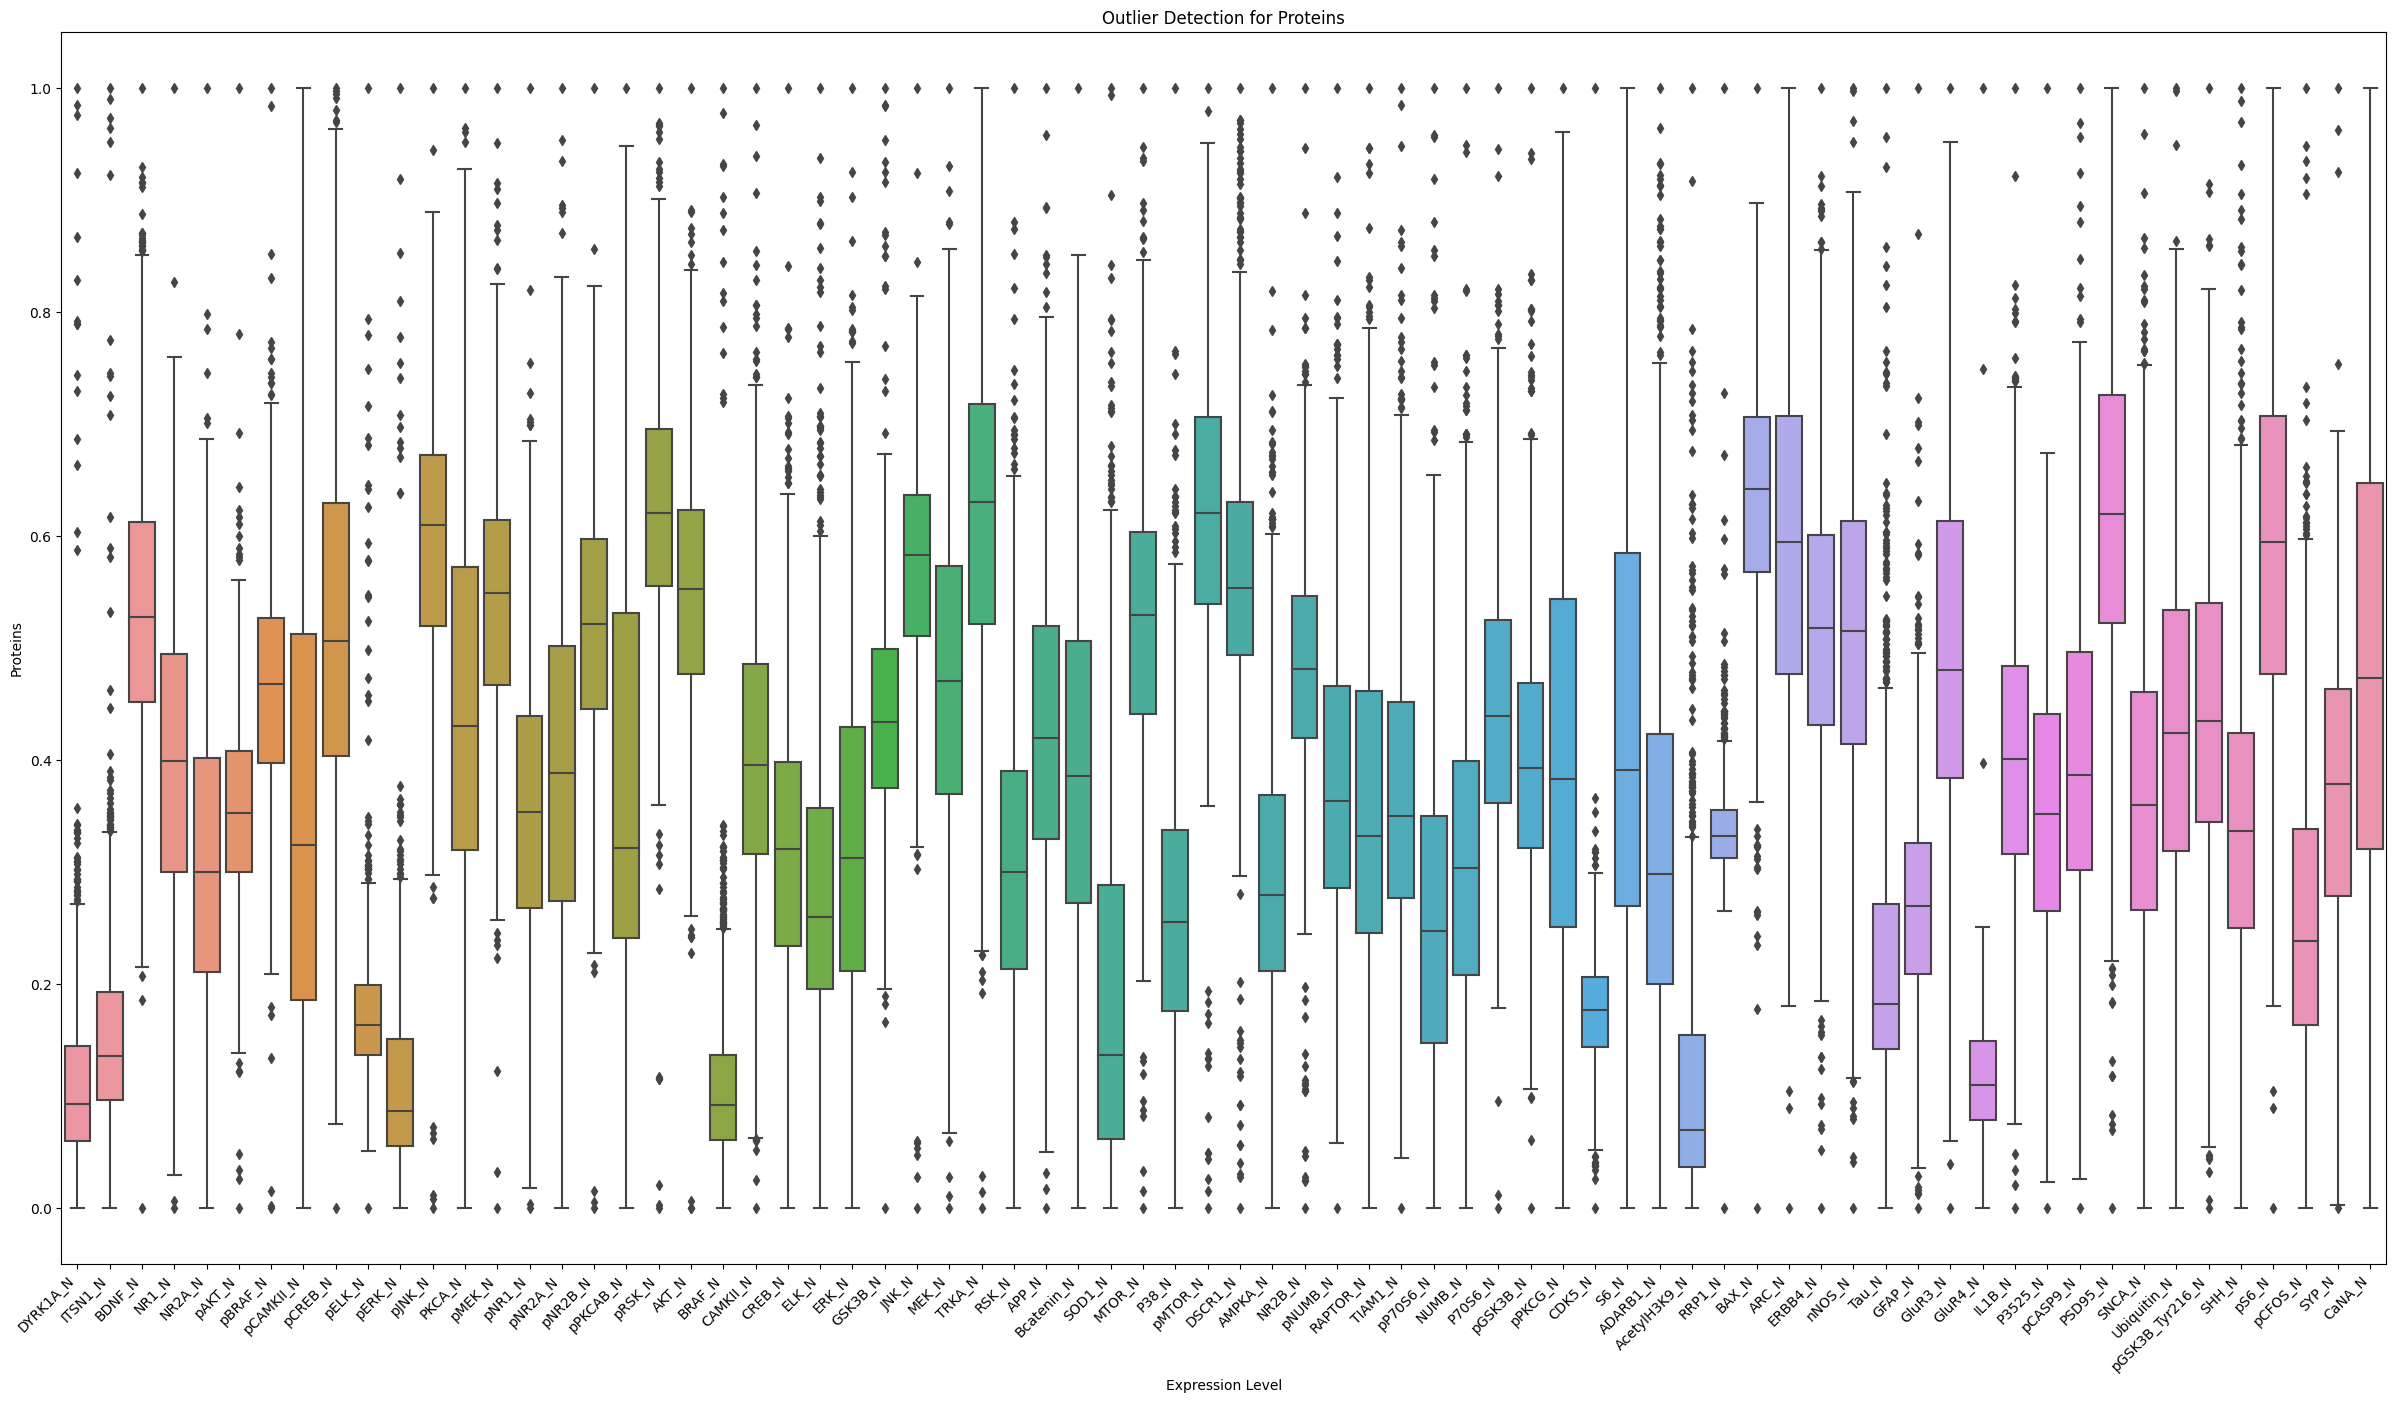

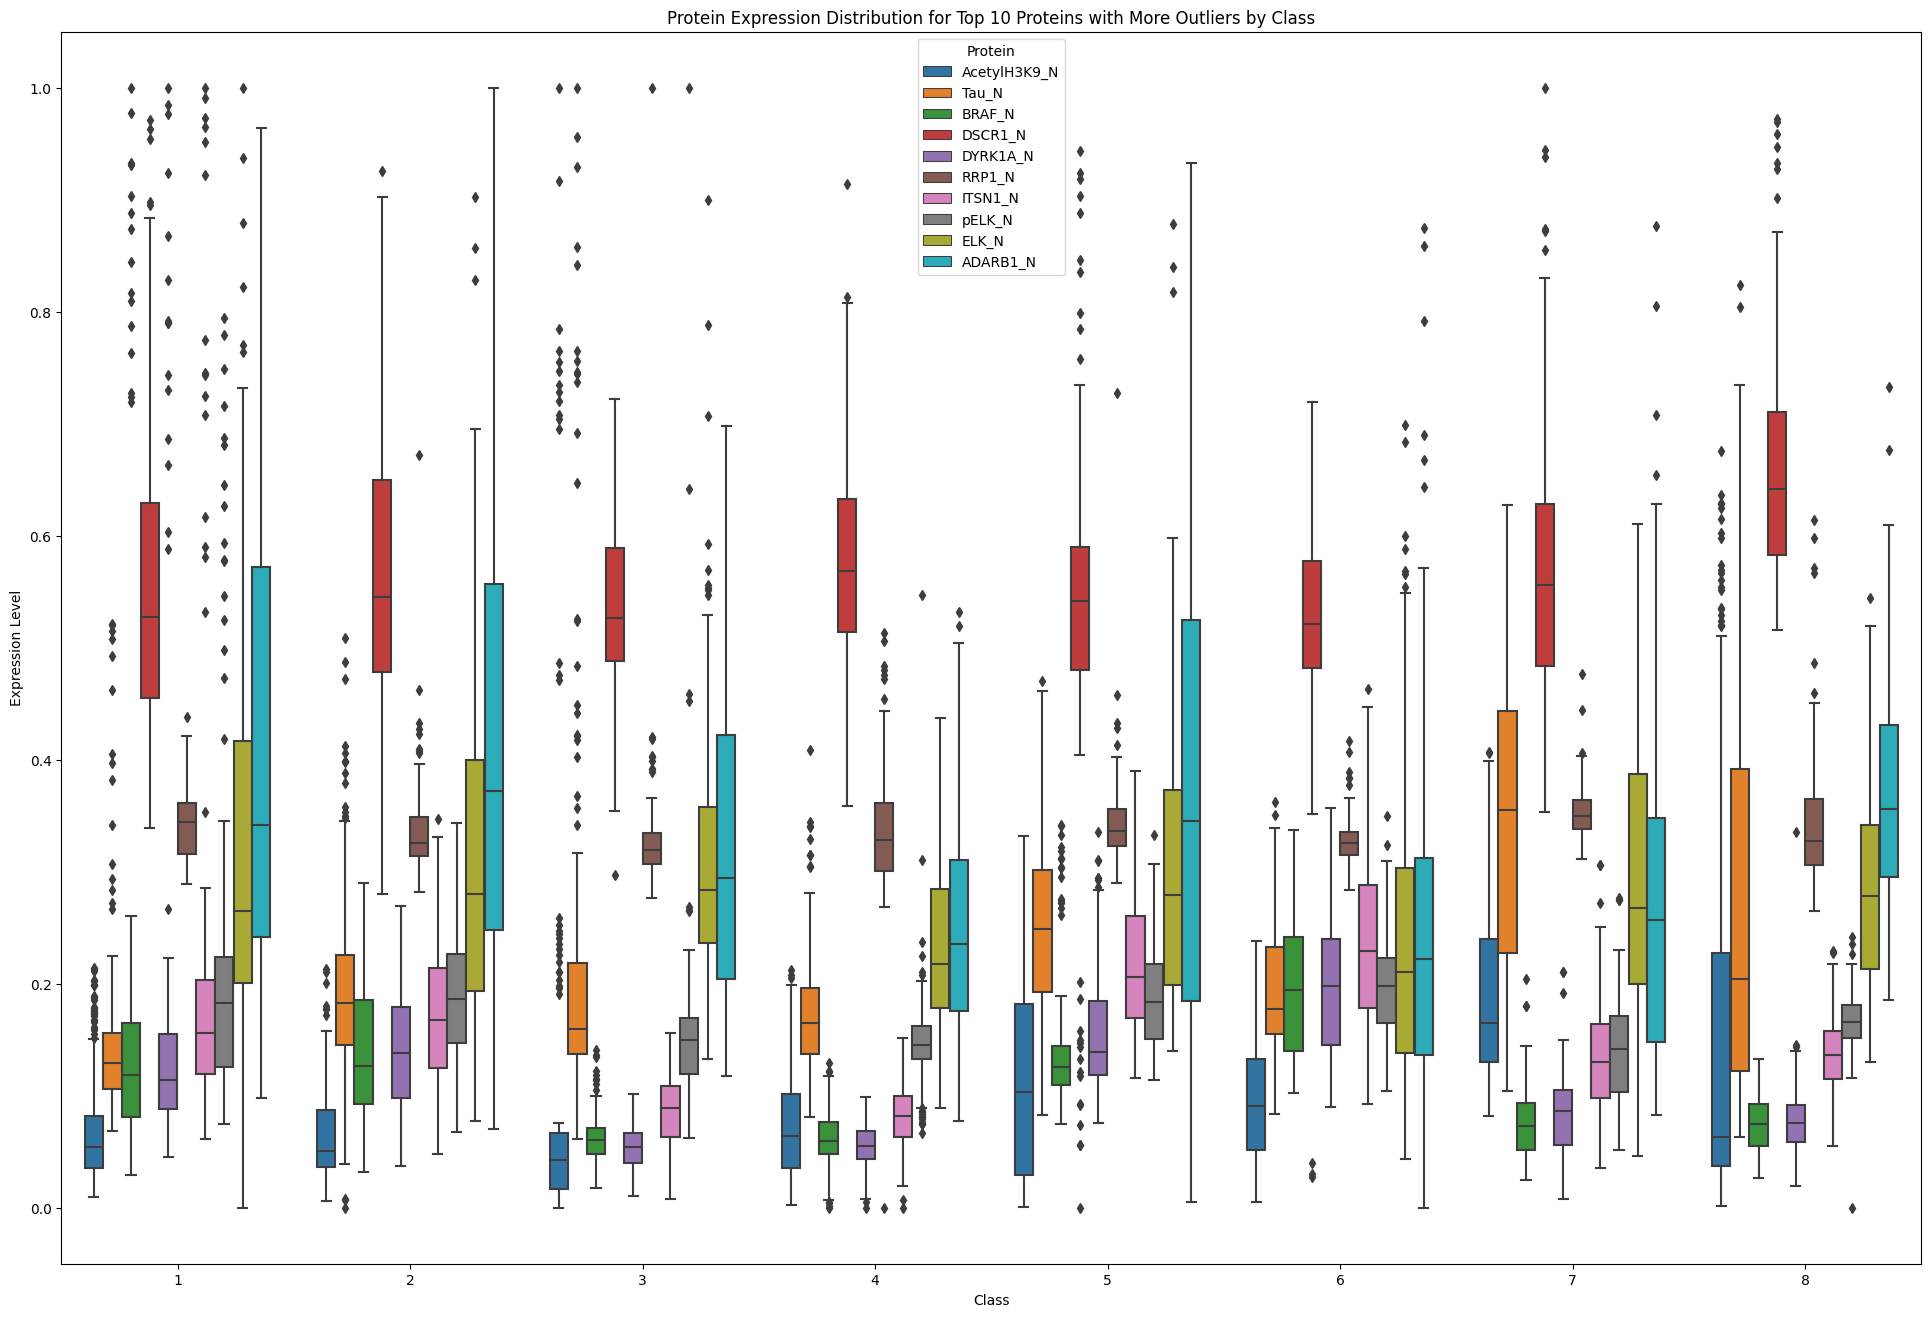

In [ ]:
# analyse_outliers(normalised_data_with_id, show_metrics=True)

# mostrem els boxplots
plot_boxplot(normalised_data_with_id)
normalised_merged_data = merge_data_with_labels(normalised_data_with_id, class_labels)
plot_top_10_proteins(normalised_merged_data, top_10_proteins)

A través dels boxplots observem la distribució d'aquests un cop normalitzades les dades i com d'aquesta manera comparteixen escala i es minimitzen les diferències entre escales i nivells de mesura.  

# 4- Separar los datos en train (2/3) y test (1/3).  (5%)

Separem les dades en train i test.

In [ ]:
#X_train_protein, X_test_protein, y_train_protein, y_test_protein = train_test_split(
    #normalised_data, class_labels, test_size=0.33, random_state=0, stratify=y_protein)

def split_and_print_shapes_indices(X, y, test_size=0.33, random_state=0):
    """
    Split the data into training and testing sets and print shapes and indices.

    Parameters:
    - X: Features (input data)
    - y: Labels (output data)
    - test_size: Proportion of the dataset to include in the test split
    - random_state: Seed for random number generation

    Returns:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training labels
    - y_test: Testing labels
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Verifiquem que s'hagi separat correctament
    print('X_train shape:', X_train.shape)
    print('y_train shape:', y_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_test shape:', y_test.shape)
    print('\nTraining set indices:\n', X_train.index)
    print('\nTesting set indices:\n', X_test.index)

    return X_train, X_test, y_train, y_test

# utilitzem la funció definida per dividir en train i test
X_protein = normalised_data
y_protein = class_labels.values.ravel()

X_train, X_test, y_train, y_test = split_and_print_shapes_indices(
    X_protein, y_protein
)

X_train shape: (723, 72)
y_train shape: (723,)
X_test shape: (357, 72)
y_test shape: (357,)

Training set indices:
 Int64Index([ 511, 1064,  884,  853,  766,  808,   53,   78,  653,  577,
            ...
             161,  563,  284,  173,  673,  941,  781,  292,  676,  180],
           dtype='int64', length=723)

Testing set indices:
 Int64Index([657, 956, 109, 896, 813, 314, 156, 835, 992, 743,
            ...
            510, 802, 183, 961, 521, 471, 498, 150, 756,   2],
           dtype='int64', length=357)


# 5- Definir el modelo 1, que consiste en una red neuronal con una capa oculta densa de 35 nodos, con activación relu. Añadir un 20% de dropout. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa. (20%)

El model definit té una capa oculta densa amb 35 nodes, activació ReLU (unidad lineal rectificada), un dropout del 20% i utilitzant l'optimitzador Adam (adaptative moment estimation).

L'activació ReLU és una de les més utilitzades en xarxes neuronals actualment per ser subtilment més ràpida de computar que altres opcions similars i facilitar la fase d'entrenament evitant la saturació de les neurones ocultes. Es caracteritza perquè la funció d'entrada de la neurona és la suma ponderada de les entrades i els pesos i la seva sortida és entre 0 i +infinit.

El 20% de dropout ajuda a preveure el sobreentrenament (overfitting). En aquest cas, el dropout desactiva un 20% dels valors aleatoris d'entrada, amb un valor igual a 0, fent que la xarxa sigui capaç de donar resultats correctes tot i tenir entrades inactives.

La capa de sortida té 8 nodes (igual al nombre de classes) amb una activació softmax per a la classificació multiclasse.

L'activació softmax és adient per optimitzar casos de classificació en què les classes són mútuament excloents. L'activació softmax és similar a la sigmoide, però el denominador suma sobre totes les neurones de sortida. Els valors de sortida de la capa de softmax són tots positius (funció exponencial) i sempre sumen 1, podent ser, per tant, interpretada com una distribució de probabilitats.


In [ ]:
# As you already know, neural networks are stochastic, which means that we need to take some care if we want our experiments to be reproducible. That means initialising the seeds for numpy, tensorflow and keras to a specific value. Let's do it: import numpy as np
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)

In [ ]:
# Definim el model 1 amb les característiques especificades.

# Especifiquem el nombre de features de la capa d'entrada
input_dim = X_train.shape[1]
model1 = Sequential()

# Afegim una capa oculta densa de 35 nodos, amb activació ReLu
model1.add(Dense(35, input_dim=input_dim, activation='relu'))

# Afegim un 20% de dropout
model1.add(Dropout(0.2))

# Definim la capa de sortida, amb 8 classes i activació softmax
model1.add(Dense(8, activation='softmax'))

# Compilem el model utilitzant l'optimitzador adam
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrem el summary
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                2555      
                                                                 
 dropout (Dropout)           (None, 35)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 288       
                                                                 
Total params: 2843 (11.11 KB)
Trainable params: 2843 (11.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


El summary ens mostra un resum dels paràmetres del model i l'arquitectura de la xarxa neuronal. El model consta de tres tipus de capes: dues denses i una de dropout.  

La primera capa és de tipus dens, amb una sortida (None, 35) i 2555 paràmetres. Aquesta xifra s'obté de multiplicar les 72 features d'entrada x 35 nodes de la capa oculta, cadascuna amb el seu pes + 35 de biaix (72*35+35=2555).

La segona capa és la del dropout, la qual modifica el valor de paràmetres tal i com s'ha comentat prèviament però no afegeix de més als 2555 que ja tenim, per tant suma 0 paràmetres.

Finalment la tercera capa és la de sortida, amb 8 classes predefinides que es multipliquen als 35 nodes de la capa oculta + 8 termes de biaix, resultant en 288 paràmetres.

El nombre total de paràmetres és la suma de tots els paràmetres de totes les capes, en aquest cas 2555+288=2843. Tots els paràmetres són trainable i no n'hi ha cap que no sigui entrenat.

(11.11 KB) ens indica l'estimació de cosnsum de memòria del model. Durant l'entrenament, el model aprendrà els pesos i els biaixos òptims per minimitzar la funció de pèrdua.





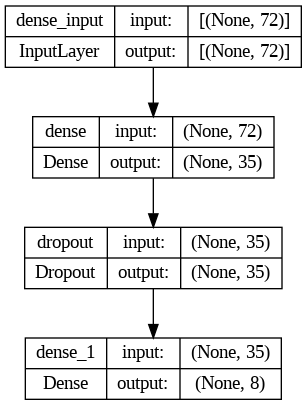

In [ ]:
# visualitzem l'arquitectura de les capes
plot_model(model1, show_shapes=True, show_layer_names=True)
# també ho podem visualitzar amb matplotlib
# tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
# visualitzem les capes de la xarxa
visualkeras.layered_view(model1)

# 6- Ajustar el modelo 1 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 50 épocas (10%)

In [ ]:
# seeds
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)

In [ ]:
# Prèviament  a ajustar el model1, observem que les classes comencen des de l'1
# en comptes de des de 0
distinct_classes = np.unique(y_train)
print("Distinct Classes:", distinct_classes)

# Restem una unitat a les classes, per tal que comencin des del 0
y_train = y_train - 1
y_test = y_test - 1

distinct_classes = np.unique(y_train)
print("Distinct Classes:", distinct_classes)

Distinct Classes: [1 2 3 4 5 6 7 8]
Distinct Classes: [0 1 2 3 4 5 6 7]


In [ ]:
# Ajustem el model1 amb un 20% de validació i 50 èpoques
history = model1.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
19/19 [==============================] - 1s 16ms/step - loss: 2.0936 - accuracy: 0.1574 - val_loss: 2.0268 - val_accuracy: 0.2552
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 2.0201 - accuracy: 0.1730 - val_loss: 1.9842 - val_accuracy: 0.2207
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 1.9880 - accuracy: 0.2059 - val_loss: 1.9377 - val_accuracy: 0.3310
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 1.9400 - accuracy: 0.2924 - val_loss: 1.9016 - val_accuracy: 0.3517
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 1.9201 - accuracy: 0.2976 - val_loss: 1.8600 - val_accuracy: 0.4483
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 1.8477 - accuracy: 0.3633 - val_loss: 1.8142 - val_accuracy: 0.5172
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 1.8128 - accuracy: 0.3858 - val_loss: 1.7747 - val_accuracy: 0.4966
Epoch 8/50
19/19 [=

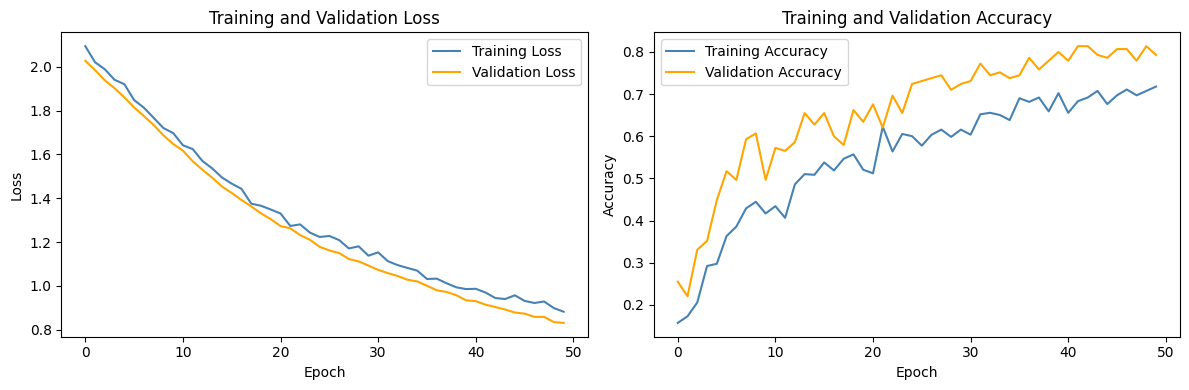

12/12 [==============================] - 0s 7ms/step - loss: 0.8071 - accuracy: 0.8123

Test Loss: 0.8071

Test Accuracy: 81.23%


In [ ]:
# Representem en dos gràfics temporals l'accuracy i el test loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='steelblue')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# loss
axes[0].plot(history.history['loss'], label='Training Loss', color='steelblue')
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

plt.tight_layout()
plt.show()

# Evaluem el model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

Quan ajustem el model es pot veure l'històric de les 50 èpoques del model definit i ajustat. A continuació hem mostrat els gràfics temporals de la pèrdua de test (loss) i accuracy pels valors d'entrenament i de validació per cada època.

El test loss avalua la pèrdua del test, és a dir, com s'ajusta el model davant nous exemples que no ha vist durant l'entrenament (l'error entre els valors predits i els veritables). El model ha obtingut un valor de pèrdua força elevat (0.8071), indicant que el model no generalitza prou bé i té problemes per predir correctament el valor de les classes. L'objectiu és minimitzar aquest valor per reduir aquest error.

En contraposició, l'alt valor d'accuracy (81.23%) indica que el model prediu força bé la major part de les vegades. Si tenim en compte ambdues mesures, en general el model dóna bons resultats, però podrien indicar-nos indicis de problemàtiques amb el sobre ajustament de les dades.

Si observem les èpoques, la pèrdua segueix una tendència de minimitzar-se, i l'accuracy segueix una tendència ascendent tot i tenir majors fluctuacions de valor, indicant ambdues mesures que el model està aprenent.

Si analitzem els gràfics, tot i anar força a la par, els resultats de la validació són superiors que els d'entrenament, indicant que el model està performant bé davant de dades noves i, per tant, reduiria la hipòtesi de sobre ajustament.

En general el model retorna bons resultats en un primer anàlisi inicial, però encara té espai de millora i d'optimització.

# 7- Obtener la tabla de clasificación errónea en test. Y las métricas usuales de evaluación. (10%)


12/12 [==============================] - 0s 4ms/step


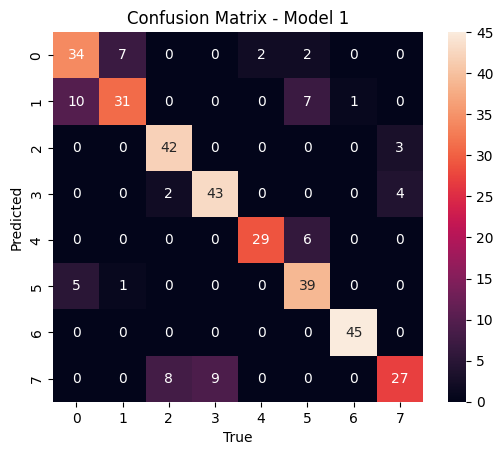

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name = 'model'):
    """
    Function to make predictions with a model and visually display the confusion matrix.

    Parameters:
    - model: Trained model
    - X_test: Test set
    - y_test: True labels of the test set

    Returns:
    - None
    """
    # Prediccions del conjunt de proves
    y_pred = model.predict(X_test)

    # Convertim les probabilitats de predicció en etiquetes de classe
    y_pred_classes = y_pred.argmax(axis=-1)

    # Matriu de confusió
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Visualize the confusion matrix
    names = np.unique(y_pred_classes)
    sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=names, yticklabels=names)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(model1, X_test, y_test, model_name = 'Model 1')


In [ ]:
# imprimim l'informe de classificació
# Prediccions del conjunt de proves
y_pred = model1.predict(X_test)
# Convertim les probabilitats de predicció en etiquetes de classe
y_pred_classes = y_pred.argmax(axis=-1)
class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:\n", class_report)

12/12 [==============================] - 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72        45
           1       0.79      0.63      0.70        49
           2       0.81      0.93      0.87        45
           3       0.83      0.88      0.85        49
           4       0.94      0.83      0.88        35
           5       0.72      0.87      0.79        45
           6       0.98      1.00      0.99        45
           7       0.79      0.61      0.69        44

    accuracy                           0.81       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.81      0.81       357



En l'informe de classificació obtenim diverses mètriques que ens permeten avaluar el model.


**Precisió:**

*Precisió = Vertaders Positius / (Vertaders Positius + Falsos Positius)*

Si mirem la mitjana ponderada pel nombre de mostres de cada classe, observem que el model té una precisió del 0.82, és a dir, el 82% dels positius predits són realment correctes sobre el total de positius. Si mirem el detall de cada classe, veiem que el model no té una mateixa precissió uniforme per totes les classes, havent diferències en la precissió en funció de la classe.


**Recall (sensitivity):**

*Recuperació = Vertaders Positius / (Vertaders Positius + Falsos Negatius)*

A diferència de la precisió, dividim per la suma de Vertaders Positius + Falsos Negatius (en comptes de + Falsos Positius). Si mirem la mitjana ponderada pel nombre de mostres de cada classe, observem que el model té una sensibilitat del 0.81, és a dir, el 81% dels positius predits són realment correctes sobre el total de verdaders positius.


**F1-Score:**

*F1-Score = 2 * (Precisió * Recall) / (Precisió + Recall)*

El F1-Score és la mitjana harmònica de la precisió i el Recall. Proporciona un equilibri entre la precisió i el Recall. En general, la mitjana ponderada pel nombre de mostres de cada classe del F1-Score és del 0.81, força òptim.


Finalment, la columna support indica el nombre de mostres de cada classe en el conjunt de proves. I en la part inferior trobem l'accuracy, que en aquest cas és del 0.81%




# 8- Definir el modelo 2, que consiste en una red neuronal con dos capas ocultas densas de 35 nodos y 15 nodos, con activación relu. Añadir un 20% de dropout en ambas capas. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa. (20%)

In [ ]:
# Definim el model 2 amb les característiques especificades.

# Especifiquem el nombre de features de la capa d'entrada
input_dim = X_train.shape[1]
model2 = Sequential()

# Afegim una capa oculta densa de 35 nodos, amb activació ReLu
model2.add(Dense(35, input_dim=input_dim, activation='relu'))
# Afegim un 20% de dropout
model2.add(Dropout(0.2))
# Afegim una capa oculta densa de 15 nodos, amb activació ReLu
model2.add(Dense(15, activation='relu'))
# Afegim un 20% de dropout
model2.add(Dropout(0.2))
# Definim la capa de sortida, amb 8 classes i activació softmax
model2.add(Dense(8, activation='softmax'))

# Compilem el model utilitzant l'optimitzador adam
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostrem el summary
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 35)                2555      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                540       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 128       
                                                                 
Total params: 3223 (12.59 KB)
Trainable params: 3223 (12.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


En el segon model, el summary ens retorna més capes que el primer, ja que té dues capes ocultes en comptes d'una.

En primer lloc, es mostren la capa de 35 nodes juntament amb la de dropout del 20%, igual que en el primer model i amb el mateix paràmetre: 72 features d'entrada x 15 nodes de la capa oculta, cadascuna amb el seu pes + 35 de biaix = 2555.

La tercera i quarta capa són noves i fan referència a la segona capa de 15 nodes afegida amb un 20% de dropout. En aquest cas el paràmetre de la capa densa és: 35 nodes previs x 15 nodes de la capa oculta, cadascuna amb el seu pes + 15 de biaix = 540.

La cinquena capa, amb 8 classes predefinides, té 128 paràmetres, resultat de multiplicar els 15 nodes de la segona capa oculta x les 8 classes + 8 classes de biaix.

El model 2, amb dues capes ocultes denses, utilitza més paràmetres que l'1: 3223 en comptes de 2843. I en conseqüència, es preveu una estimació de consum de la memòria lleugerament més alta.


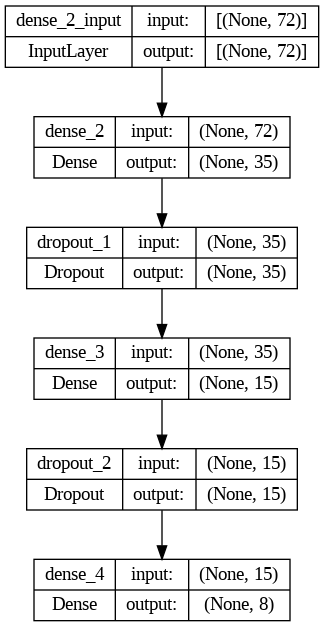

In [ ]:
# visualitzem l'arquitectura de les capes
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model2)

# 9- Ajustar el modelo 2 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 50 épocas. (10%)


In [ ]:
# As you already know, neural networks are stochastic, which means that we need to take some care if we want our experiments to be reproducible. That means initialising the seeds for numpy, tensorflow and keras to a specific value. Let's do it: import numpy as np
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)

In [ ]:
# Fit Model 2 with 20% validation
history_model2 = model2.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,  # 20% of the training data will be used for validation
    verbose=1
)


Epoch 1/50
19/19 [==============================] - 3s 34ms/step - loss: 2.0929 - accuracy: 0.1107 - val_loss: 2.0274 - val_accuracy: 0.1310
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 2.0369 - accuracy: 0.1522 - val_loss: 1.9953 - val_accuracy: 0.2483
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 1.9975 - accuracy: 0.2059 - val_loss: 1.9498 - val_accuracy: 0.2759
Epoch 4/50
19/19 [==============================] - 0s 13ms/step - loss: 1.9451 - accuracy: 0.2491 - val_loss: 1.8894 - val_accuracy: 0.3103
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 1.8976 - accuracy: 0.2647 - val_loss: 1.8349 - val_accuracy: 0.3448
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 1.8556 - accuracy: 0.2336 - val_loss: 1.7647 - val_accuracy: 0.3448
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 1.7839 - accuracy: 0.2924 - val_loss: 1.6934 - val_accuracy: 0.3793
Epoch 8/50
19/19 

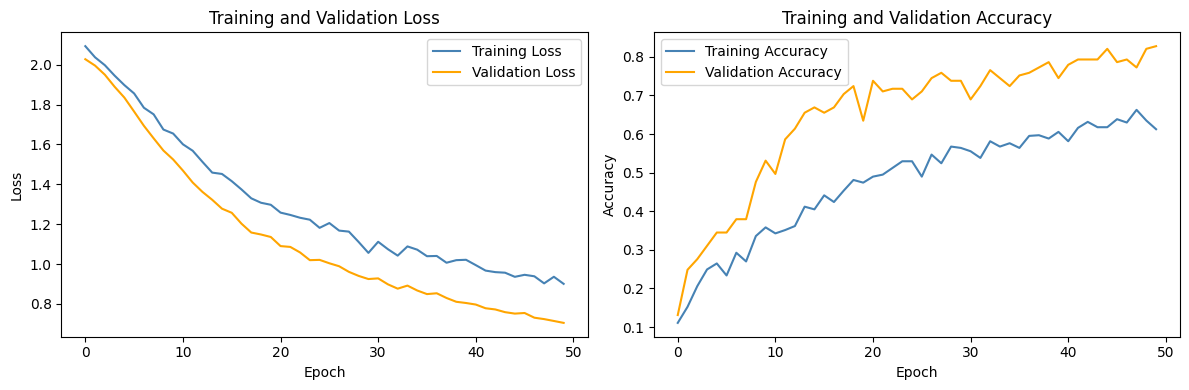

12/12 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.7759

Test Loss: 0.7219

Test Accuracy: 77.59%


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# accuracy
axes[1].plot(history_model2.history['accuracy'], label='Training Accuracy', color='steelblue')
axes[1].plot(history_model2.history['val_accuracy'], label='Validation Accuracy', color='orange')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# loss
axes[0].plot(history_model2.history['loss'], label='Training Loss', color='steelblue')
axes[0].plot(history_model2.history['val_loss'], label='Validation Loss', color='orange')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

plt.tight_layout()
plt.show()

# Evaluem el model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Quan ajustem el model veiem l'històric de les 50 èpoques del model definit i ajustat. A continuació hem mostrat els gràfics temporals de la pèrdua de test (loss) i accuracy pels valors d'entrenament i de validació per cada època tal i com hem fet amb el primer model.

El model ha obtingut un valor de pèrdua força elevat (0.7219), indicant que el model no generalitza prou bé i té problemes per predir correctament el valor de les classes. L'objectiu és minimitzar aquest valor per reduir aquest error.

El valor d'accuracy (77.59%) indica que el model prediu força bé gran  part de les vegades. Si tenim en compte ambdues mesures, en general el model dóna bons resultats, però encara es podrien optimitzar molt més per aconseguir millors resultats.

Si observem les èpoques, la pèrdua segueix una tendència de minimitzar-se, i l'accuracy segueix una tendència ascendent tot i tenir majors fluctuacions de valor, indicant ambdues mesures que el model està aprenent.

Si analitzem els gràfics, tot i anar força a la par, els resultats de la validació de l'acuracy són superiors que els d'entrenament, indicant que el model està performant bé davant de dades noves i, per tant, reduiria la hipòtesi de sobre ajustament. Tanmateix, la distància en l'accuracy entre el conjunt d'entrenament i de test és força més ample que al model 1 indicant, podent ser un indici de sobreajustament i no generalització.

En general el model retorna bons resultats en un primer anàlisi inicial, però encara té espai de millora i d'optimització.

# 10- Comparar en test, mediante las métricas de evaluación, los dos modelos. (5%)

12/12 [==============================] - 0s 2ms/step

Confusion Matrix - Model 1:
[[34  7  0  0  2  2  0  0]
 [10 31  0  0  0  7  1  0]
 [ 0  0 42  0  0  0  0  3]
 [ 0  0  2 43  0  0  0  4]
 [ 0  0  0  0 29  6  0  0]
 [ 5  1  0  0  0 39  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  8  9  0  0  0 27]]

Confusion Matrix - Model 2:
[[34  6  0  0  1  4  0  0]
 [10 32  0  0  0  7  0  0]
 [ 0  0 41  0  0  0  1  3]
 [ 0  0  0 48  0  0  0  1]
 [ 3  0  0  0 23  9  0  0]
 [14  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0  0  7 14  0  0  0 23]]
12/12 [==============================] - 0s 2ms/step


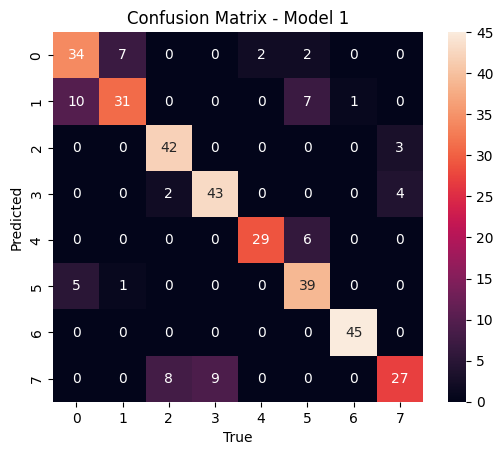

12/12 [==============================] - 0s 2ms/step


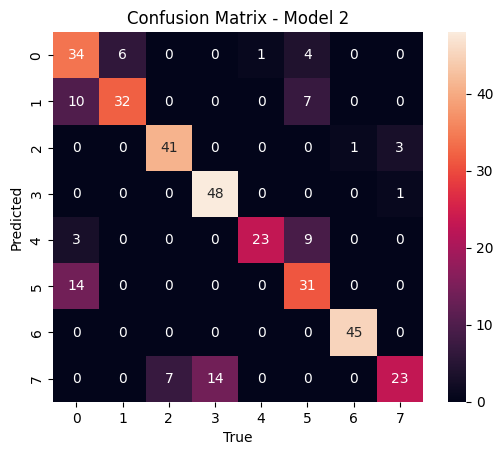

In [ ]:
# Guardem les prediccions
y_pred_model1 = model1.predict(X_test)
y_pred_classes_model1 = y_pred_model1.argmax(axis=-1)
y_pred_model2 = model2.predict(X_test)
y_pred_classes_model2 = y_pred_model2.argmax(axis=-1)

# Mostrem la matriu de confusió
print("\nConfusion Matrix - Model 1:")
print(confusion_matrix(y_test, y_pred_classes_model1))
print("\nConfusion Matrix - Model 2:")
print(confusion_matrix(y_test, y_pred_classes_model2))

plot_confusion_matrix(model1, X_test, y_test, 'Model 1')
plot_confusion_matrix(model2, X_test, y_test, 'Model 2')

In [ ]:
# Mostrem el classification Report
print("\nClassification Report - Model 1:")
print(classification_report(y_test, y_pred_classes_model1))
print("\nClassification Report - Model 2:")
print(classification_report(y_test, y_pred_classes_model2))

# Evaluem els models
results_model1 = model1.evaluate(X_test, y_test)
print("\nModel 1 - Test Loss:", results_model1[0])
print("\nModel 1 - Test Accuracy:", results_model1[1])
results_model2 = model2.evaluate(X_test, y_test)
print("\nModel 2 - Test Loss:", results_model2[0])
print("\nModel 2 - Test Accuracy:", results_model2[1])

# Comparem l'accuracy i el loss
if results_model1[1] > results_model2[1]:
    print("\nModel 1 has higher accuracy on the test set.")
elif results_model1[1] < results_model2[1]:
    print("\nModel 2 has higher accuracy on the test set.")
else:
    print("\nBoth models have the same accuracy on the test set.")

if results_model1[0] < results_model2[0]:
    print("\nModel 1 has lower loss on the test set.")
elif results_model1[0] > results_model2[0]:
    print("\nModel 2 has lower loss on the test set.")
else:
    print("\nBoth models have the same loss on the test set.")


Classification Report - Model 1:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        45
           1       0.79      0.63      0.70        49
           2       0.81      0.93      0.87        45
           3       0.83      0.88      0.85        49
           4       0.94      0.83      0.88        35
           5       0.72      0.87      0.79        45
           6       0.98      1.00      0.99        45
           7       0.79      0.61      0.69        44

    accuracy                           0.81       357
   macro avg       0.82      0.81      0.81       357
weighted avg       0.82      0.81      0.81       357


Classification Report - Model 2:
              precision    recall  f1-score   support

           0       0.56      0.76      0.64        45
           1       0.84      0.65      0.74        49
           2       0.85      0.91      0.88        45
           3       0.77      0.98      0.86        49
          

Si comparem ambdós models, els dos presenten un rendiment similar tot i que el model 1 aconsegueix una precisió major. Per tant, en termes de prediccions globals correctes, el model 1 obté millors resultats.

Tanmateix, cal tenir en compte que el test loss del Model 2 és menor, suggerint que potser té un millor potencial de generalització malgrat tenir una precisió lleugerament inferior.

Els valors tant del macro com del ponderat de F1 indiquen una lleugera millora en l'equilibri entre la precisió i la recuperació en el Model 1.

Si observem les matrius de confusió, ambdós models mostren punts forts i dèbils en diferents classes.

Per tant, podem concloure que ambdós models ofereixen un rendiment semblant, assolint el primer model uns resultats globals millors, però alhora amb un loss també major, suggerint un cert grau de sobreajustament. D'altra banda, el Model 2, tot i obtenir resultats lleugerament inferiors, mostra un test loss més baix (0.72 comparat amb 0.80), indicant una millor capacitat de generalització.

Considerant només la precisió, el Model 1 seria la millor opció. No obstant això, si prioritzem també evitar el sobreajustament i valorar la capacitat de generalització, el Model 2 podria ser preferible tot i els resultats de precisió lleugerament inferiors.

Finalment, ambdós models encara tenen marge d'optimització per tal de ser millorats i d'aconseguir uns majors resultats.

Per continuar, s'hauria d'analitzar com optimitzar el model: per exemple si els resultats són qüestió de velocitat d'aprenentatge (amb 50 èpoques no és suficient) o es podrien millorar aplicant tècniques de regularització o expansió artificial de les dades entra altres per evitar el sobreentrenament.